<a href="https://colab.research.google.com/github/MOREENNATURINDA/HDSC-Introduction-to-Python-for-machine-learning/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libaries

In [361]:
import numpy as np
import pandas as pd
import scipy as sp

#import data processing
from sklearn.model_selection import train_test_split

#import models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest

#import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

#import visualization libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

IMBLEARN LIBRARY

In [362]:
# data manipulation
import pandas as pd
import numpy as np
import scipy as sp

#data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams["figure.figsize"]=(12,6)

#import data processing
from sklearn.model_selection import train_test_split

#import models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn import svm
from sklearn.svm import SVC
from sklearn.impute import KNNImputer

#import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

#import visualization libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import the library for handling class imbalance
import imblearn
# for warning 
import warnings
warnings.filterwarnings('ignore')

In [363]:
df=pd.read_excel("VL.xls")
df.head()

,Age,Gender,BASELINE REGIMEN START DATE,BASELINE REGIMEN,CURRENT ARV REGIMEN,BASELINE CD4,BASELINE WEIGHT,Baseline WHO HIV CLINICAL STAG,OTHER CARE ENTRY POINT,ENTRY POINT INTO HIV CARE,TUBERCULOSIS STATUS baseline,Nutrition Assesment,ARV ADHERENCE,TPT STATUS,VL_Status,HIV VIRAL LOAD,Advanced Disease Status,ARV REGIMEN DAYS DISPENSED,Deceased,TRANSFER OUT DATE,Encounter Date,Encounter Date.1,RETURN VISIT DATE,LAST VISIT DATE,CERVICAL CANCER SCREENING,TB LAM RESULTS,CRAG TEST RESULTS,RPR TEST RESULTS,WHO HIV CLINICAL STAGE,BODY HEIGHT,TUBERCULOSIS STATUS current,Occupation,ARV REGIMEN DAYS DISPENSED.1,District,SEPTRIN PILL DOSAGE,Duration_ART
0,51,F,2011-06-02,AZT-3TC-NVP,AZT-3TC-NVP,180.0,52.0,NaN,NaN,NaN,No signs or symptoms of TB,NaN,NaN,NaN,NaN,NaN,NaN,60.0,False,2013-02-21,2011-03-03,2013-02-21,2013-04-18,2013-02-21,NaN,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 2,NaN,No signs or symptoms of TB,NaN,60.0,Lyantonde,60.0,20.710059
1,41,F,2011-05-18,TDF-3TC-NVP,TDF-FTC-EFV,32.0,NaN,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,2011-05-18,2011-10-28,2011-11-25,2011-10-28,NaN,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 3,NaN,No signs or symptoms of TB,NaN,NaN,Lwengo,30.0,5.358317
2,44,M,2009-07-14,AZT-3TC-NVP,TDF-3TC-LPV/r,259.0,64.0,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaT,2007-02-13,2012-02-21,2012-02-17,2012-02-21,NaN,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 2,NaN,No signs or symptoms of TB,NaN,NaN,Lyantonde,30.0,31.295201
3,46,M,2005-03-03,D4T-3TC-NVP,TDF/3TC/DTG,NaN,NaN,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,NaN,NaN,Treatment complete,0.0,250.0,No Advanced Disease,90.0,False,NaT,2005-01-06,2022-09-01,2022-12-02,2022-09-01,NaN,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 2,NaN,No signs or symptoms of TB,ART AIDE,90.0,Lyantonde,60.0,210.092045
4,52,M,2006-03-07,D4T-3TC-NVP,TDF/3TC/DTG,35.0,50.0,NaN,TI,OTHER SPECIFY,No signs or symptoms of TB,NaN,NaN,Treatment complete,0.0,40.0,No Advanced Disease,60.0,False,NaT,2005-12-27,2022-06-21,2022-08-22,2022-06-21,NaN,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 2,NaN,No signs or symptoms of TB,NaN,60.0,Lyantonde,30.0,195.595003


In [364]:
df.shape

(9902, 36)

In [365]:
df.isnull().sum()

Age                                  0
Gender                               0
BASELINE REGIMEN START DATE       2134
BASELINE REGIMEN                  2133
CURRENT ARV REGIMEN               1869
BASELINE CD4                      4660
BASELINE WEIGHT                   3042
Baseline WHO HIV CLINICAL STAG    9900
OTHER CARE ENTRY POINT            8627
ENTRY POINT INTO HIV CARE         2297
TUBERCULOSIS STATUS baseline       288
Nutrition Assesment               9774
ARV ADHERENCE                     9902
TPT STATUS                        5683
VL_Status                         4803
HIV VIRAL LOAD                    4803
Advanced Disease Status           6524
ARV REGIMEN DAYS DISPENSED        2436
Deceased                             0
TRANSFER OUT DATE                 8753
Encounter Date                       0
Encounter Date.1                     0
RETURN VISIT DATE                  149
LAST VISIT DATE                      0
CERVICAL CANCER SCREENING         8082
TB LAM RESULTS           

In [366]:
df1=df
df1.isnull().sum()

Age                                  0
Gender                               0
BASELINE REGIMEN START DATE       2134
BASELINE REGIMEN                  2133
CURRENT ARV REGIMEN               1869
BASELINE CD4                      4660
BASELINE WEIGHT                   3042
Baseline WHO HIV CLINICAL STAG    9900
OTHER CARE ENTRY POINT            8627
ENTRY POINT INTO HIV CARE         2297
TUBERCULOSIS STATUS baseline       288
Nutrition Assesment               9774
ARV ADHERENCE                     9902
TPT STATUS                        5683
VL_Status                         4803
HIV VIRAL LOAD                    4803
Advanced Disease Status           6524
ARV REGIMEN DAYS DISPENSED        2436
Deceased                             0
TRANSFER OUT DATE                 8753
Encounter Date                       0
Encounter Date.1                     0
RETURN VISIT DATE                  149
LAST VISIT DATE                      0
CERVICAL CANCER SCREENING         8082
TB LAM RESULTS           

In [367]:
# Removing patients who are not active on ART
# remaining patients who are active
df2=df.loc[df["Deceased"]!=True]
df2.shape

(9257, 36)

In [368]:
# remaining values without null values
#df4["Viral_load_status"].dropna(0)

df3=df2.drop(df2[df2['VL_Status'].isnull()].index)
df3.head()

,Age,Gender,BASELINE REGIMEN START DATE,BASELINE REGIMEN,CURRENT ARV REGIMEN,BASELINE CD4,BASELINE WEIGHT,Baseline WHO HIV CLINICAL STAG,OTHER CARE ENTRY POINT,ENTRY POINT INTO HIV CARE,TUBERCULOSIS STATUS baseline,Nutrition Assesment,ARV ADHERENCE,TPT STATUS,VL_Status,HIV VIRAL LOAD,Advanced Disease Status,ARV REGIMEN DAYS DISPENSED,Deceased,TRANSFER OUT DATE,Encounter Date,Encounter Date.1,RETURN VISIT DATE,LAST VISIT DATE,CERVICAL CANCER SCREENING,TB LAM RESULTS,CRAG TEST RESULTS,RPR TEST RESULTS,WHO HIV CLINICAL STAGE,BODY HEIGHT,TUBERCULOSIS STATUS current,Occupation,ARV REGIMEN DAYS DISPENSED.1,District,SEPTRIN PILL DOSAGE,Duration_ART
3,46,M,2005-03-03,D4T-3TC-NVP,TDF/3TC/DTG,NaN,NaN,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,NaN,NaN,Treatment complete,0.0,250.0,No Advanced Disease,90.0,False,NaT,2005-01-06,2022-09-01,2022-12-02,2022-09-01,NaN,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 2,NaN,No signs or symptoms of TB,ART AIDE,90.0,Lyantonde,60.0,210.092045
4,52,M,2006-03-07,D4T-3TC-NVP,TDF/3TC/DTG,35.0,50.0,NaN,TI,OTHER SPECIFY,No signs or symptoms of TB,NaN,NaN,Treatment complete,0.0,40.0,No Advanced Disease,60.0,False,NaT,2005-12-27,2022-06-21,2022-08-22,2022-06-21,NaN,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 2,NaN,No signs or symptoms of TB,NaN,60.0,Lyantonde,30.0,195.595003
5,60,F,2011-05-27,AZT-3TC-NVP,TDF/3TC/DTG,216.0,53.0,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,NORMAL,NaN,Treatment complete,0.0,40.0,No Advanced Disease,90.0,False,NaT,2010-09-14,2022-11-07,2022-11-07,2022-08-10,No evidence of Malignancy,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 3,NaN,No signs or symptoms of TB,NaN,90.0,Lyantonde,30.0,134.549638
8,48,M,2011-05-31,AZT-3TC-NVP,TDF/3TC/DTG,106.0,60.0,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,NaN,NaN,Treatment complete,0.0,40.0,No Advanced Disease,90.0,False,NaT,2011-03-29,2022-09-06,2022-12-13,2022-09-06,NaN,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 3,NaN,No signs or symptoms of TB,NaN,90.0,Lyantonde,30.0,135.305720
9,41,F,2011-03-16,AZT-3TC-NVP,TDF/3TC/DTG,139.0,46.0,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,NaN,NaN,Treatment complete,0.0,40.0,No Advanced Disease,180.0,False,NaT,2011-01-04,2022-09-19,2023-03-30,2022-09-19,No evidence of Malignancy,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 2,NaN,No signs or symptoms of TB,NaN,180.0,Ssembabule,60.0,138.231427


In [369]:

df3["ART_DURATION"]=df3["Duration_ART"].round()
#df3= pd.concat([df3, AA], axis=1)
df3.drop(['Duration_ART'], axis=1, inplace=True)
df3.head()

,Age,Gender,BASELINE REGIMEN START DATE,BASELINE REGIMEN,CURRENT ARV REGIMEN,BASELINE CD4,BASELINE WEIGHT,Baseline WHO HIV CLINICAL STAG,OTHER CARE ENTRY POINT,ENTRY POINT INTO HIV CARE,TUBERCULOSIS STATUS baseline,Nutrition Assesment,ARV ADHERENCE,TPT STATUS,VL_Status,HIV VIRAL LOAD,Advanced Disease Status,ARV REGIMEN DAYS DISPENSED,Deceased,TRANSFER OUT DATE,Encounter Date,Encounter Date.1,RETURN VISIT DATE,LAST VISIT DATE,CERVICAL CANCER SCREENING,TB LAM RESULTS,CRAG TEST RESULTS,RPR TEST RESULTS,WHO HIV CLINICAL STAGE,BODY HEIGHT,TUBERCULOSIS STATUS current,Occupation,ARV REGIMEN DAYS DISPENSED.1,District,SEPTRIN PILL DOSAGE,ART_DURATION
3,46,M,2005-03-03,D4T-3TC-NVP,TDF/3TC/DTG,NaN,NaN,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,NaN,NaN,Treatment complete,0.0,250.0,No Advanced Disease,90.0,False,NaT,2005-01-06,2022-09-01,2022-12-02,2022-09-01,NaN,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 2,NaN,No signs or symptoms of TB,ART AIDE,90.0,Lyantonde,60.0,210.0
4,52,M,2006-03-07,D4T-3TC-NVP,TDF/3TC/DTG,35.0,50.0,NaN,TI,OTHER SPECIFY,No signs or symptoms of TB,NaN,NaN,Treatment complete,0.0,40.0,No Advanced Disease,60.0,False,NaT,2005-12-27,2022-06-21,2022-08-22,2022-06-21,NaN,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 2,NaN,No signs or symptoms of TB,NaN,60.0,Lyantonde,30.0,196.0
5,60,F,2011-05-27,AZT-3TC-NVP,TDF/3TC/DTG,216.0,53.0,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,NORMAL,NaN,Treatment complete,0.0,40.0,No Advanced Disease,90.0,False,NaT,2010-09-14,2022-11-07,2022-11-07,2022-08-10,No evidence of Malignancy,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 3,NaN,No signs or symptoms of TB,NaN,90.0,Lyantonde,30.0,135.0
8,48,M,2011-05-31,AZT-3TC-NVP,TDF/3TC/DTG,106.0,60.0,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,NaN,NaN,Treatment complete,0.0,40.0,No Advanced Disease,90.0,False,NaT,2011-03-29,2022-09-06,2022-12-13,2022-09-06,NaN,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 3,NaN,No signs or symptoms of TB,NaN,90.0,Lyantonde,30.0,135.0
9,41,F,2011-03-16,AZT-3TC-NVP,TDF/3TC/DTG,139.0,46.0,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,NaN,NaN,Treatment complete,0.0,40.0,No Advanced Disease,180.0,False,NaT,2011-01-04,2022-09-19,2023-03-30,2022-09-19,No evidence of Malignancy,NaN,NaN,NaN,HIV WHO CLINICAL STAGE 2,NaN,No signs or symptoms of TB,NaN,180.0,Ssembabule,60.0,138.0


In [370]:
df3.isnull().sum()

Age                                  0
Gender                               0
BASELINE REGIMEN START DATE         50
BASELINE REGIMEN                    51
CURRENT ARV REGIMEN                  0
BASELINE CD4                      1509
BASELINE WEIGHT                    523
Baseline WHO HIV CLINICAL STAG    4959
OTHER CARE ENTRY POINT            3973
ENTRY POINT INTO HIV CARE          447
TUBERCULOSIS STATUS baseline         0
Nutrition Assesment               4835
ARV ADHERENCE                     4961
TPT STATUS                         921
VL_Status                            0
HIV VIRAL LOAD                       0
Advanced Disease Status           1657
ARV REGIMEN DAYS DISPENSED           0
Deceased                             0
TRANSFER OUT DATE                 4564
Encounter Date                       0
Encounter Date.1                     0
RETURN VISIT DATE                    0
LAST VISIT DATE                      0
CERVICAL CANCER SCREENING         3171
TB LAM RESULTS           

In [371]:
# removing patients without the baseline regimen start datte
df3.rename(columns={"BASELINE REGIMEN START DATE":"Regimen_startdate"},inplace=True)
df4=df3.drop(df3[df3['Regimen_startdate'].isnull()].index)
df4.shape

(4911, 36)

In [372]:
# eliminating redundant and unwanted covariates
df4.drop(columns=["Baseline WHO HIV CLINICAL STAG","OTHER CARE ENTRY POINT","Nutrition Assesment","ARV ADHERENCE","TRANSFER OUT DATE","Encounter Date","Encounter Date.1","RETURN VISIT DATE","CERVICAL CANCER SCREENING","TB LAM RESULTS","CRAG TEST RESULTS","RPR TEST RESULTS","BODY HEIGHT","Occupation"],axis=1,inplace=True)

df4.head()

,Age,Gender,Regimen_startdate,BASELINE REGIMEN,CURRENT ARV REGIMEN,BASELINE CD4,BASELINE WEIGHT,ENTRY POINT INTO HIV CARE,TUBERCULOSIS STATUS baseline,TPT STATUS,VL_Status,HIV VIRAL LOAD,Advanced Disease Status,ARV REGIMEN DAYS DISPENSED,Deceased,LAST VISIT DATE,WHO HIV CLINICAL STAGE,TUBERCULOSIS STATUS current,ARV REGIMEN DAYS DISPENSED.1,District,SEPTRIN PILL DOSAGE,ART_DURATION
3,46,M,2005-03-03,D4T-3TC-NVP,TDF/3TC/DTG,NaN,NaN,MEDICAL OUTPATIENT,No signs or symptoms of TB,Treatment complete,0.0,250.0,No Advanced Disease,90.0,False,2022-09-01,HIV WHO CLINICAL STAGE 2,No signs or symptoms of TB,90.0,Lyantonde,60.0,210.0
4,52,M,2006-03-07,D4T-3TC-NVP,TDF/3TC/DTG,35.0,50.0,OTHER SPECIFY,No signs or symptoms of TB,Treatment complete,0.0,40.0,No Advanced Disease,60.0,False,2022-06-21,HIV WHO CLINICAL STAGE 2,No signs or symptoms of TB,60.0,Lyantonde,30.0,196.0
5,60,F,2011-05-27,AZT-3TC-NVP,TDF/3TC/DTG,216.0,53.0,MEDICAL OUTPATIENT,No signs or symptoms of TB,Treatment complete,0.0,40.0,No Advanced Disease,90.0,False,2022-08-10,HIV WHO CLINICAL STAGE 3,No signs or symptoms of TB,90.0,Lyantonde,30.0,135.0
8,48,M,2011-05-31,AZT-3TC-NVP,TDF/3TC/DTG,106.0,60.0,MEDICAL OUTPATIENT,No signs or symptoms of TB,Treatment complete,0.0,40.0,No Advanced Disease,90.0,False,2022-09-06,HIV WHO CLINICAL STAGE 3,No signs or symptoms of TB,90.0,Lyantonde,30.0,135.0
9,41,F,2011-03-16,AZT-3TC-NVP,TDF/3TC/DTG,139.0,46.0,MEDICAL OUTPATIENT,No signs or symptoms of TB,Treatment complete,0.0,40.0,No Advanced Disease,180.0,False,2022-09-19,HIV WHO CLINICAL STAGE 2,No signs or symptoms of TB,180.0,Ssembabule,60.0,138.0


In [373]:
# Eliminating patients without CD4 results since over 1400 

df4.rename(columns={"BASELINE CD4":"CD4_baseline"},inplace=True)
df4.rename(columns={"Advanced Disease Status":"Advanced_Disease"},inplace=True)
df5=df4.drop(df4[df4["CD4_baseline"].isnull()].index)
df5.isnull().sum()

Age                                0
Gender                             0
Regimen_startdate                  0
BASELINE REGIMEN                   3
CURRENT ARV REGIMEN                0
CD4_baseline                       0
BASELINE WEIGHT                  166
ENTRY POINT INTO HIV CARE        350
TUBERCULOSIS STATUS baseline       0
TPT STATUS                       613
VL_Status                          0
HIV VIRAL LOAD                     0
Advanced_Disease                1144
ARV REGIMEN DAYS DISPENSED         0
Deceased                           0
LAST VISIT DATE                    0
WHO HIV CLINICAL STAGE             1
TUBERCULOSIS STATUS current        0
ARV REGIMEN DAYS DISPENSED.1       0
District                           5
SEPTRIN PILL DOSAGE              292
ART_DURATION                       0
dtype: int64

In [374]:
# removing patients without advanced disease status results

df6=df5.drop(df5[df5["Advanced_Disease"].isnull()].index)
df6.isnull().sum()

Age                               0
Gender                            0
Regimen_startdate                 0
BASELINE REGIMEN                  0
CURRENT ARV REGIMEN               0
CD4_baseline                      0
BASELINE WEIGHT                 113
ENTRY POINT INTO HIV CARE       197
TUBERCULOSIS STATUS baseline      0
TPT STATUS                        1
VL_Status                         0
HIV VIRAL LOAD                    0
Advanced_Disease                  0
ARV REGIMEN DAYS DISPENSED        0
Deceased                          0
LAST VISIT DATE                   0
WHO HIV CLINICAL STAGE            0
TUBERCULOSIS STATUS current       0
ARV REGIMEN DAYS DISPENSED.1      0
District                          2
SEPTRIN PILL DOSAGE             252
ART_DURATION                      0
dtype: int64

In [375]:
# removing patients without entry point into HIV care
df6.rename(columns={"ENTRY POINT INTO HIV CARE":"HIVCare_EntryPoint"},inplace=True)
df7=df6.drop(df6[df6["HIVCare_EntryPoint"].isnull()].index)
df7.isnull().sum()

Age                               0
Gender                            0
Regimen_startdate                 0
BASELINE REGIMEN                  0
CURRENT ARV REGIMEN               0
CD4_baseline                      0
BASELINE WEIGHT                 107
HIVCare_EntryPoint                0
TUBERCULOSIS STATUS baseline      0
TPT STATUS                        1
VL_Status                         0
HIV VIRAL LOAD                    0
Advanced_Disease                  0
ARV REGIMEN DAYS DISPENSED        0
Deceased                          0
LAST VISIT DATE                   0
WHO HIV CLINICAL STAGE            0
TUBERCULOSIS STATUS current       0
ARV REGIMEN DAYS DISPENSED.1      0
District                          2
SEPTRIN PILL DOSAGE             252
ART_DURATION                      0
dtype: int64

In [376]:
# handling missingness for TPT status and district with model function
df7.rename(columns={"TPT STATUS":"TPT_STATUS"},inplace=True)
df7["TPT_STATUS"].fillna(df7["TPT_STATUS"].mode().values[0],inplace=True)
df7["District"].fillna(df7["District"].mode().values[0],inplace=True)
df7.isnull().sum()



Age                               0
Gender                            0
Regimen_startdate                 0
BASELINE REGIMEN                  0
CURRENT ARV REGIMEN               0
CD4_baseline                      0
BASELINE WEIGHT                 107
HIVCare_EntryPoint                0
TUBERCULOSIS STATUS baseline      0
TPT_STATUS                        0
VL_Status                         0
HIV VIRAL LOAD                    0
Advanced_Disease                  0
ARV REGIMEN DAYS DISPENSED        0
Deceased                          0
LAST VISIT DATE                   0
WHO HIV CLINICAL STAGE            0
TUBERCULOSIS STATUS current       0
ARV REGIMEN DAYS DISPENSED.1      0
District                          0
SEPTRIN PILL DOSAGE             252
ART_DURATION                      0
dtype: int64

In [377]:
# handling the missingness for continous variables
df8=df7.fillna(df7.mean().iloc[0])
df8.isnull().sum()


Age                             0
Gender                          0
Regimen_startdate               0
BASELINE REGIMEN                0
CURRENT ARV REGIMEN             0
CD4_baseline                    0
BASELINE WEIGHT                 0
HIVCare_EntryPoint              0
TUBERCULOSIS STATUS baseline    0
TPT_STATUS                      0
VL_Status                       0
HIV VIRAL LOAD                  0
Advanced_Disease                0
ARV REGIMEN DAYS DISPENSED      0
Deceased                        0
LAST VISIT DATE                 0
WHO HIV CLINICAL STAGE          0
TUBERCULOSIS STATUS current     0
ARV REGIMEN DAYS DISPENSED.1    0
District                        0
SEPTRIN PILL DOSAGE             0
ART_DURATION                    0
dtype: int64

In [378]:
df8.shape

(2109, 22)

In [379]:
# generating age groups
df8.loc[df8["Age"]<=13,"age_group"]="Teenager"
df8.loc[df8["Age"].between(14,35),"age_group"]="Youth"
df8.loc[df8["Age"]>=36,"age_group"]="Adults"
df8.age_group.value_counts()

Adults      1446
Youth        613
Teenager      50
Name: age_group, dtype: int64

In [380]:
# dropping variable age after generating age groups
df8.drop(['Age'],axis=1,inplace=True)
df8.head()

,Gender,Regimen_startdate,BASELINE REGIMEN,CURRENT ARV REGIMEN,CD4_baseline,BASELINE WEIGHT,HIVCare_EntryPoint,TUBERCULOSIS STATUS baseline,TPT_STATUS,VL_Status,HIV VIRAL LOAD,Advanced_Disease,ARV REGIMEN DAYS DISPENSED,Deceased,LAST VISIT DATE,WHO HIV CLINICAL STAGE,TUBERCULOSIS STATUS current,ARV REGIMEN DAYS DISPENSED.1,District,SEPTRIN PILL DOSAGE,ART_DURATION,age_group
4,M,2006-03-07,D4T-3TC-NVP,TDF/3TC/DTG,35.0,50.0,OTHER SPECIFY,No signs or symptoms of TB,Treatment complete,0.0,40.0,No Advanced Disease,60.0,False,2022-06-21,HIV WHO CLINICAL STAGE 2,No signs or symptoms of TB,60.0,Lyantonde,30.0,196.0,Adults
5,F,2011-05-27,AZT-3TC-NVP,TDF/3TC/DTG,216.0,53.0,MEDICAL OUTPATIENT,No signs or symptoms of TB,Treatment complete,0.0,40.0,No Advanced Disease,90.0,False,2022-08-10,HIV WHO CLINICAL STAGE 3,No signs or symptoms of TB,90.0,Lyantonde,30.0,135.0,Adults
8,M,2011-05-31,AZT-3TC-NVP,TDF/3TC/DTG,106.0,60.0,MEDICAL OUTPATIENT,No signs or symptoms of TB,Treatment complete,0.0,40.0,No Advanced Disease,90.0,False,2022-09-06,HIV WHO CLINICAL STAGE 3,No signs or symptoms of TB,90.0,Lyantonde,30.0,135.0,Adults
9,F,2011-03-16,AZT-3TC-NVP,TDF/3TC/DTG,139.0,46.0,MEDICAL OUTPATIENT,No signs or symptoms of TB,Treatment complete,0.0,40.0,No Advanced Disease,180.0,False,2022-09-19,HIV WHO CLINICAL STAGE 2,No signs or symptoms of TB,180.0,Ssembabule,60.0,138.0,Adults
17,M,2010-11-02,AZT-3TC-EFV,TDF/3TC/DTG,211.0,54.0,MEDICAL OUTPATIENT,No signs or symptoms of TB,Treatment complete,0.0,40.0,No Advanced Disease,180.0,False,2022-08-08,HIV WHO CLINICAL STAGE 3,No signs or symptoms of TB,180.0,Lwengo,960.0,141.0,Adults


In [381]:
# generating a variable for grouping the duration on ART
df8.loc[df8["ART_DURATION"].between(6,12),"ART_Duration"]="btn 6 and 12 months"
df8.loc[df8["ART_DURATION"].between(13,24),"ART_Duration"]="btn 13 and 24 months"
df8.loc[df8["ART_DURATION"].between(25,36),"ART_Duration"]="btn 25 and 36 months"
df8.loc[df8["ART_DURATION"]>=37,"ART_Duration"]="Morethan 36 months"
df8.ART_Duration.value_counts()

Morethan 36 months      1735
btn 25 and 36 months     167
btn 13 and 24 months     150
btn 6 and 12 months       57
Name: ART_Duration, dtype: int64

In [382]:
#Dropping the variable for duration on ART after generating groups
df8.drop(["ART_DURATION"],axis=1,inplace=True)
#df8.drop([" ART_Duration_categories"],axis=1,inplace=True)
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 4 to 9901
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Gender                        2109 non-null   object        
 1   Regimen_startdate             2109 non-null   datetime64[ns]
 2   BASELINE REGIMEN              2109 non-null   object        
 3   CURRENT ARV REGIMEN           2109 non-null   object        
 4   CD4_baseline                  2109 non-null   float64       
 5   BASELINE WEIGHT               2109 non-null   float64       
 6   HIVCare_EntryPoint            2109 non-null   object        
 7   TUBERCULOSIS STATUS baseline  2109 non-null   object        
 8   TPT_STATUS                    2109 non-null   object        
 9   VL_Status                     2109 non-null   float64       
 10  HIV VIRAL LOAD                2109 non-null   float64       
 11  Advanced_Disease              

In [383]:
# Grouping weight of patients
df8.rename(columns={"BASELINE WEIGHT":"Weight"},inplace=True)
df8.loc[df8["Weight"].between(5,25),"WEIGHT"]="btn 5 and 25 kgs"
df8.loc[df8["Weight"].between(26,46),"WEIGHT"]="btn 26 and 46 kgs"
df8.loc[df8["Weight"].between(47,67),"WEIGHT"]="btn 47 and 67 kgs"
df8.loc[df8["Weight"].between(68,88),"WEIGHT"]="btn 68 and 88 kgs"
df8.loc[df8["Weight"]>=89,"WEIGHT"]="Morethan 88 kgs"
# dropping the variablefor weight for creating groups
df8.drop(["Weight"],axis=1,inplace=True)
df8.WEIGHT.value_counts()


btn 47 and 67 kgs    1392
btn 26 and 46 kgs     352
btn 68 and 88 kgs     266
btn 5 and 25 kgs       75
Morethan 88 kgs        24
Name: WEIGHT, dtype: int64

In [384]:
# Grouping the septrin pill dosage of patients
df8.rename(columns={"SEPTRIN PILL DOSAGE":"Septrin"},inplace=True)
df8.loc[df8["Septrin"].between(0,30),"Septrin_dosage"]="btn 0 and 30 tabs"
df8.loc[df8["Septrin"].between(31,60),"Septrin_dosage"]="btn 31 and 60 tabs"
df8.loc[df8["Septrin"].between(61,90),"Septrin_dosage"]="btn 61 and 90 kgs"
df8.loc[df8["Septrin"].between(91,120),"Septrin_dosage"]=" btn 91 and 120 tabs"
df8.loc[df8["Septrin"]>=121,"Septrin_dosage"]="Morethan 120 tabs"
df8.Septrin_dosage.value_counts()


btn 0 and 30 tabs       1252
btn 31 and 60 tabs       596
btn 61 and 90 kgs        244
Morethan 120 tabs         15
 btn 91 and 120 tabs       2
Name: Septrin_dosage, dtype: int64

In [385]:
# dropping column for septrin after grouping
df8.drop(["Septrin"],axis=1,inplace=True)

In [386]:
#Grouping CD4 of patients at baseline
df8.loc[df8["CD4_baseline"]<200,"CD4_category"]="<200cells/mm3"
df8.loc[df8["CD4_baseline"].between(200,499),"CD4_category"]="btn 200 and 499"
df8.loc[df8["CD4_baseline"]>=500,"CD4_category"]=">=500cells/mm3"

df8.CD4_category.value_counts()

btn 200 and 499    997
<200cells/mm3      709
>=500cells/mm3     403
Name: CD4_category, dtype: int64

In [387]:
# dropping the baseline CD4 after grouping
df8.drop(["CD4_baseline"],axis=1,inplace=True)
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 4 to 9901
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Gender                        2109 non-null   object        
 1   Regimen_startdate             2109 non-null   datetime64[ns]
 2   BASELINE REGIMEN              2109 non-null   object        
 3   CURRENT ARV REGIMEN           2109 non-null   object        
 4   HIVCare_EntryPoint            2109 non-null   object        
 5   TUBERCULOSIS STATUS baseline  2109 non-null   object        
 6   TPT_STATUS                    2109 non-null   object        
 7   VL_Status                     2109 non-null   float64       
 8   HIV VIRAL LOAD                2109 non-null   float64       
 9   Advanced_Disease              2109 non-null   object        
 10  ARV REGIMEN DAYS DISPENSED    2109 non-null   float64       
 11  Deceased                      

In [388]:
#Grouping the ARV REGIMEN DAYS DISPENSED for patients
df8["ARV REGIMEN DAYS DISPENSED"].round()
df8["ARV REGIMEN DAYS DISPENSED"].describe()

df8.rename(columns={"ARV REGIMEN DAYS DISPENSED":"ARV_DAYS_DISPENSED"},inplace=True)
df8.loc[df8["ARV_DAYS_DISPENSED"]<=30,"ARV_days_dispensed"]="btn 0 and 30 days"
df8.loc[df8["ARV_DAYS_DISPENSED"].between(31,60),"ARV_days_dispensed"]="btn 31 and 60 days"
df8.loc[df8["ARV_DAYS_DISPENSED"].between(61,90),"ARV_days_dispensed"]="btn 61 and 90 days"
df8.loc[df8["ARV_DAYS_DISPENSED"].between(91,120),"ARV_days_dispensed"]="btn 91 and 120 days"
df8.loc[df8["ARV_DAYS_DISPENSED"].between(121,1180),"ARV_days_dispensed"]="btn 120 and 1180 days"
df8.drop(["ARV_DAYS_DISPENSED"],axis=1,inplace=True)
df8.ARV_days_dispensed.value_counts()

btn 61 and 90 days       1058
btn 120 and 1180 days     438
btn 91 and 120 days       404
btn 31 and 60 days        131
btn 0 and 30 days          78
Name: ARV_days_dispensed, dtype: int64

In [389]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 4 to 9901
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Gender                        2109 non-null   object        
 1   Regimen_startdate             2109 non-null   datetime64[ns]
 2   BASELINE REGIMEN              2109 non-null   object        
 3   CURRENT ARV REGIMEN           2109 non-null   object        
 4   HIVCare_EntryPoint            2109 non-null   object        
 5   TUBERCULOSIS STATUS baseline  2109 non-null   object        
 6   TPT_STATUS                    2109 non-null   object        
 7   VL_Status                     2109 non-null   float64       
 8   HIV VIRAL LOAD                2109 non-null   float64       
 9   Advanced_Disease              2109 non-null   object        
 10  Deceased                      2109 non-null   bool          
 11  LAST VISIT DATE               

In [390]:
#  viewing the baseline regimen
df8.rename(columns={"BASELINE REGIMEN":"Baseline_Regimen"},inplace=True)

df8.Baseline_Regimen.value_counts()

TDF-3TC-EFV                 997
AZT-3TC-NVP                 481
TDF/3TC/DTG                 258
AZT-3TC-EFV                 125
TDF-3TC-NVP                 110
D4T-3TC-NVP                  81
ABC-3TC-EFV                  14
ABC-3TC-LPV/r                14
OTHER FIRST LINE REGIMEN     12
ABC-3TC-NVP                   6
D4T-3TC-EFV                   4
ABC/3TC/DTG                   4
TDF-FTC-NVP                   3
Name: Baseline_Regimen, dtype: int64

In [391]:
#Distribution of the current regimen as the covariate
df8.rename(columns={"CURRENT ARV REGIMEN":"Current_Regimen"},inplace=True)
df8.Current_Regimen.value_counts()

TDF/3TC/DTG      1952
ABC/3TC/DTG        85
AZT/3TC/DTG        34
TDF-3TC-EFV        23
ABC-3TC-ATV/r       4
AZT-3TC-ATV/r       3
OTHER SPECIFY       2
ABC-3TC-LPV/r       2
TDF-FTC-NVP         2
TDF-FTC-EFV         1
AZT-3TC-LPV/r       1
Name: Current_Regimen, dtype: int64

In [392]:
#Distribution of baseline TB status
df8.rename(columns={"TUBERCULOSIS STATUS baseline":"TB_Baseline"},inplace=True)
df8.TB_Baseline.value_counts()

No signs or symptoms of TB              2017
Suspect TB - referred or sputum sent      83
Currently on TB treatment                  6
TB Treatment Completed                     2
TB Diagnosed - TB LAM                      1
Name: TB_Baseline, dtype: int64

In [393]:
#Distribution of current TB status
df8.rename(columns={"TUBERCULOSIS STATUS current":"TB_Current"},inplace=True)
df8.TB_Current.value_counts()

No signs or symptoms of TB              2017
Suspect TB - referred or sputum sent      83
Currently on TB treatment                  6
TB Treatment Completed                     2
TB Diagnosed - TB LAM                      1
Name: TB_Current, dtype: int64

In [394]:
#Distribution of the TPT Status
df8.rename(columns={"TPT STATUS":"TPT_STATUS"},inplace=True)
df8.TPT_STATUS.value_counts()

Treatment complete                     1962
CURRENTLY ON INH PROPHYLAXIS FOR TB      74
Never                                    34
TOXICITY OR SIDE-EFFECTS                 29
Defaulted                                10
Name: TPT_STATUS, dtype: int64

In [395]:
#DISTRIBUTION THE TARGET VARIABLE (VIRAL LOAD)
df8.VL_Status.value_counts()

0.0    1971
1.0     138
Name: VL_Status, dtype: int64

Text(0, 0.5, 'Frequencies')

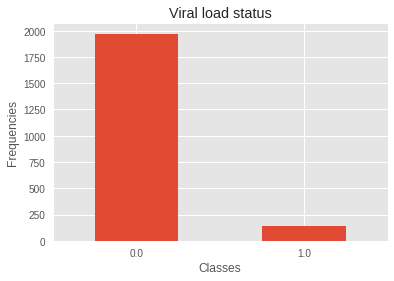

In [396]:
import pandas as pd
class_count= pd.value_counts(df8['VL_Status'], sort=True)
class_count.plot(kind='bar', rot=0)
plt.title('Viral load status')
plt.xticks(range(2))
plt.xlabel('Classes')
plt.ylabel('Frequencies')

Text(0, 0.5, 'counts')

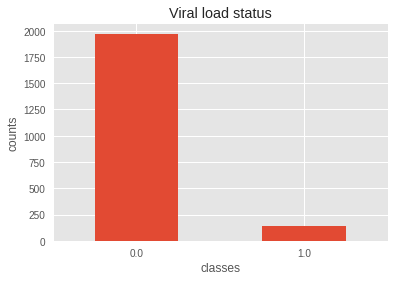

In [397]:
class_count= pd.value_counts(df8['VL_Status'], sort=True)
class_count.plot(kind='bar', rot=0)
plt.title('Viral load status')
plt.xticks(range(2))
plt.xlabel('classes')
plt.ylabel('counts')


In [398]:
#Distribution of the advanced disease status
#df4.rename(columns={"Advanced Disease Status":"Advanced_Disease"},inplace=True)
df8.Advanced_Disease.value_counts()

No Advanced Disease                    2084
Suspected Advanced Disease               12
Confirmed Advanced Disease-Pos TB        10
Confirmed Advanced Disease-Pos CrAg       3
Name: Advanced_Disease, dtype: int64

In [399]:
#Distribution of the WHO Clinical 
df8.rename(columns={"WHO HIV CLINICAL STAGE":"WHO_stage"},inplace=True)
df8.WHO_stage.value_counts()

HIV WHO CLINICAL STAGE 1     812
HIV WHO CLINICAL STAGE 2     628
HIV WHO CLINICAL STAGE 3     382
HIV WHO CLINICAL STAGE T1    154
HIV WHO CLINICAL STAGE T2     86
HIV WHO CLINICAL STAGE T3     23
HIV WHO CLINICAL STAGE 4      22
HIV WHO CLINICAL STAGE T4      2
Name: WHO_stage, dtype: int64

In [400]:
# Cross tabulation of WHO Clinical stage against the target variable
print(pd.crosstab(df8["Gender"],df6["VL_Status"],margins=True,margins_name="Totals"))
print(pd.crosstab(df8["Gender"],df6["VL_Status"],margins=True,margins_name="Totals",normalize=True)*100)

VL_Status   0.0  1.0  Totals
Gender                      
F          1213   67    1280
M           758   71     829
Totals     1971  138    2109
VL_Status        0.0       1.0      Totals
Gender                                    
F          57.515410  3.176861   60.692271
M          35.941204  3.366524   39.307729
Totals     93.456615  6.543385  100.000000


In [401]:
#Removing more columns that are redudant

#df4.drop(columns=["Baseline WHO HIV CLINICAL STAG","OTHER CARE ENTRY POINT","Nutrition Assesment","ARV ADHERENCE","TRANSFER OUT DATE","Encounter Date","Encounter Date.1","RETURN VISIT DATE","CERVICAL CANCER SCREENING","TB LAM RESULTS","CRAG TEST RESULTS","RPR TEST RESULTS","BODY HEIGHT","Occupation"],axis=1,inplace=True)
df8.drop(columns=["Regimen_startdate","HIV VIRAL LOAD","Deceased","LAST VISIT DATE","ARV REGIMEN DAYS DISPENSED.1","TB_Current"],axis=1,inplace=True)
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 4 to 9901
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              2109 non-null   object 
 1   Baseline_Regimen    2109 non-null   object 
 2   Current_Regimen     2109 non-null   object 
 3   HIVCare_EntryPoint  2109 non-null   object 
 4   TB_Baseline         2109 non-null   object 
 5   TPT_STATUS          2109 non-null   object 
 6   VL_Status           2109 non-null   float64
 7   Advanced_Disease    2109 non-null   object 
 8   WHO_stage           2109 non-null   object 
 9   District            2109 non-null   object 
 10  age_group           2109 non-null   object 
 11  ART_Duration        2109 non-null   object 
 12  WEIGHT              2109 non-null   object 
 13  Septrin_dosage      2109 non-null   object 
 14  CD4_category        2109 non-null   object 
 15  ARV_days_dispensed  2109 non-null   object 
dtypes: flo

In [402]:
#Distribution of the target variable
df8.VL_Status.value_counts()

0.0    1971
1.0     138
Name: VL_Status, dtype: int64

In [403]:
#Outlier detection and removal in each column
# removing the outliers
low = .05
high = .95

# Step 1: compute 5% percentile and the 95% percentile of each column in the dataset
quantile_df =df8.quantile([low, high])
quantile_df

,VL_Status
0.05,0.0
0.95,1.0


The target **variable**

In [404]:
df9=df8
y=df9["VL_Status"].values
y

array([0., 0., 0., ..., 0., 0., 0.])

**The independent variables**

In [405]:
data=df9
data.drop(columns=["VL_Status"],axis=1,inplace=True)
data.head()

X=data
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 4 to 9901
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              2109 non-null   object
 1   Baseline_Regimen    2109 non-null   object
 2   Current_Regimen     2109 non-null   object
 3   HIVCare_EntryPoint  2109 non-null   object
 4   TB_Baseline         2109 non-null   object
 5   TPT_STATUS          2109 non-null   object
 6   Advanced_Disease    2109 non-null   object
 7   WHO_stage           2109 non-null   object
 8   District            2109 non-null   object
 9   age_group           2109 non-null   object
 10  ART_Duration        2109 non-null   object
 11  WEIGHT              2109 non-null   object
 12  Septrin_dosage      2109 non-null   object
 13  CD4_category        2109 non-null   object
 14  ARV_days_dispensed  2109 non-null   object
dtypes: object(15)
memory usage: 263.6+ KB


**One hot encoding for all independent variables**

In [406]:
# Step 1: one hot encode the categorical covariate

features = ['Gender','Baseline_Regimen','Current_Regimen','HIVCare_EntryPoint','TB_Baseline','TPT_STATUS','Advanced_Disease','WHO_stage','District','age_group','ART_Duration','WEIGHT','Septrin_dosage','CD4_category','ARV_days_dispensed']
#features = ["ARV_days_dispensed","CD4_category","Septrin_dosage","WEIGHT","ART_Duration","age_group","District"]
for f in features:
  # one hot encode the covariate 
  one_hot_encoding = pd.get_dummies(X[f], prefix= f)
   #use pd.concat to join the new columns with your original dataframe
  X = pd.concat([X, one_hot_encoding], axis= 1)
  # now drop the original 'country' column (you don't need it anymore)
  X.drop([f], axis=1, inplace= True)
# View data after encoding ['cylinders','model year','origin']
X.head()

,Gender_F,Gender_M,Baseline_Regimen_ABC-3TC-EFV,Baseline_Regimen_ABC-3TC-LPV/r,Baseline_Regimen_ABC-3TC-NVP,Baseline_Regimen_ABC/3TC/DTG,Baseline_Regimen_AZT-3TC-EFV,Baseline_Regimen_AZT-3TC-NVP,Baseline_Regimen_D4T-3TC-EFV,Baseline_Regimen_D4T-3TC-NVP,Baseline_Regimen_OTHER FIRST LINE REGIMEN,Baseline_Regimen_TDF-3TC-EFV,Baseline_Regimen_TDF-3TC-NVP,Baseline_Regimen_TDF-FTC-NVP,Baseline_Regimen_TDF/3TC/DTG,Current_Regimen_ABC-3TC-ATV/r,Current_Regimen_ABC-3TC-LPV/r,Current_Regimen_ABC/3TC/DTG,Current_Regimen_AZT-3TC-ATV/r,Current_Regimen_AZT-3TC-LPV/r,Current_Regimen_AZT/3TC/DTG,Current_Regimen_OTHER SPECIFY,Current_Regimen_TDF-3TC-EFV,Current_Regimen_TDF-FTC-EFV,Current_Regimen_TDF-FTC-NVP,Current_Regimen_TDF/3TC/DTG,HIVCare_EntryPoint_IDU OUTREACH,HIVCare_EntryPoint_MEDICAL INPATIENT,HIVCare_EntryPoint_MEDICAL OUTPATIENT,HIVCare_EntryPoint_OTHER SPECIFY,HIVCare_EntryPoint_PMTCT,HIVCare_EntryPoint_STI OUTPATIENT,HIVCare_EntryPoint_TB TREATMENT CENTER,HIVCare_EntryPoint_UNDER 5,HIVCare_EntryPoint_YCC-Young child clinic,TB_Baseline_Currently on TB treatment,TB_Baseline_No signs or symptoms of TB,TB_Baseline_Suspect TB - referred or sputum sent,TB_Baseline_TB Diagnosed - TB LAM,TB_Baseline_TB Treatment Completed,TPT_STATUS_CURRENTLY ON INH PROPHYLAXIS FOR TB,TPT_STATUS_Defaulted,TPT_STATUS_Never,TPT_STATUS_TOXICITY OR SIDE-EFFECTS,TPT_STATUS_Treatment complete,Advanced_Disease_Confirmed Advanced Disease-Pos CrAg,Advanced_Disease_Confirmed Advanced Disease-Pos TB,Advanced_Disease_No Advanced Disease,Advanced_Disease_Suspected Advanced Disease,WHO_stage_HIV WHO CLINICAL STAGE 1,WHO_stage_HIV WHO CLINICAL STAGE 2,WHO_stage_HIV WHO CLINICAL STAGE 3,WHO_stage_HIV WHO CLINICAL STAGE 4,WHO_stage_HIV WHO CLINICAL STAGE T1,WHO_stage_HIV WHO CLINICAL STAGE T2,WHO_stage_HIV WHO CLINICAL STAGE T3,WHO_stage_HIV WHO CLINICAL STAGE T4,District_Kiruhura,District_Lwengo,District_Lyantonde,District_Masaka,District_Mbarara,District_Other,District_RAKAI,District_Ssembabule,age_group_Adults,age_group_Teenager,age_group_Youth,ART_Duration_Morethan 36 months,ART_Duration_btn 13 and 24 months,ART_Duration_btn 25 and 36 months,ART_Duration_btn 6 and 12 months,WEIGHT_Morethan 88 kgs,WEIGHT_btn 26 and 46 kgs,WEIGHT_btn 47 and 67 kgs,WEIGHT_btn 5 and 25 kgs,WEIGHT_btn 68 and 88 kgs,Septrin_dosage_ btn 91 and 120 tabs,Septrin_dosage_Morethan 120 tabs,Septrin_dosage_btn 0 and 30 tabs,Septrin_dosage_btn 31 and 60 tabs,Septrin_dosage_btn 61 and 90 kgs,CD4_category_<200cells/mm3,CD4_category_>=500cells/mm3,CD4_category_btn 200 and 499,ARV_days_dispensed_btn 0 and 30 days,ARV_days_dispensed_btn 120 and 1180 days,ARV_days_dispensed_btn 31 and 60 days,ARV_days_dispensed_btn 61 and 90 days,ARV_days_dispensed_btn 91 and 120 days
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
17,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


**Feature selection using recursive feature elimination(rfe)**

In [407]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features

BestFeatures = SelectKBest(score_func=chi2, k=20)
fit = BestFeatures.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization

f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score']
f_Scores

,Specs,Score
0,Gender_F,3.586606
1,Gender_M,5.537824
2,Baseline_Regimen_ABC-3TC-EFV,5.072523
3,Baseline_Regimen_ABC-3TC-LPV/r,1.372330
4,Baseline_Regimen_ABC-3TC-NVP,1.005498
5,Baseline_Regimen_ABC/3TC/DTG,0.280061
6,Baseline_Regimen_AZT-3TC-EFV,0.088129
7,Baseline_Regimen_AZT-3TC-NVP,1.038278
8,Baseline_Regimen_D4T-3TC-EFV,0.280061
9,Baseline_Regimen_D4T-3TC-NVP,6.558892


In [408]:
# print 20 best features in descending order
scores=f_Scores.nlargest(90,'Score')
scores

,Specs,Score
20,Current_Regimen_AZT/3TC/DTG,207.587407
75,WEIGHT_btn 5 and 25 kgs,37.373929
17,Current_Regimen_ABC/3TC/DTG,29.763101
82,CD4_category_<200cells/mm3,29.242982
18,Current_Regimen_AZT-3TC-ATV/r,17.733483
66,age_group_Teenager,14.805704
37,TB_Baseline_Suspect TB - referred or sputum sent,14.466672
19,Current_Regimen_AZT-3TC-LPV/r,14.282609
25,Current_Regimen_TDF/3TC/DTG,10.692960
78,Septrin_dosage_Morethan 120 tabs,9.932905


**Feature importance of the model withrandom forest**

In [409]:
import matplotlib.pyplot as plt
model=RandomForest(n_estimators=350, random_state=42)
model.fit(X,y)

# model feature importance
print(model.feature_importances_)




[2.62768441e-02 2.64327945e-02 2.41771186e-03 1.79753426e-03
 1.39488118e-03 2.13900775e-04 1.05679893e-02 2.77301354e-02
 1.15448516e-04 1.42258036e-02 2.07129644e-03 2.56273754e-02
 1.35846259e-02 3.85149356e-04 4.83139707e-03 2.27121231e-03
 1.46261119e-04 1.42651289e-02 5.25596426e-03 1.94448227e-03
 5.96472164e-02 2.57079481e-03 4.16341094e-03 3.57869596e-05
 5.19472981e-05 4.50102217e-02 1.44705127e-02 4.60321311e-03
 2.90132435e-02 1.77060468e-02 1.04033270e-02 2.01408622e-04
 5.20944996e-04 8.19368997e-05 2.34695650e-04 1.00353067e-03
 1.07342397e-02 9.96520038e-03 2.87414363e-05 1.09171467e-05
 6.31894719e-03 2.20813983e-04 4.87355422e-03 4.95427257e-03
 1.07215909e-02 7.74604076e-04 3.50729866e-04 1.09003201e-03
 4.94753591e-04 2.52520311e-02 2.81613054e-02 2.45147628e-02
 5.40257662e-03 6.13338581e-03 6.47160457e-03 5.56561520e-03
 3.28667157e-05 2.38346211e-02 2.66492015e-02 3.14458296e-02
 1.39444404e-04 1.67648610e-03 1.03023397e-04 1.10698710e-02
 7.50832146e-03 1.844454

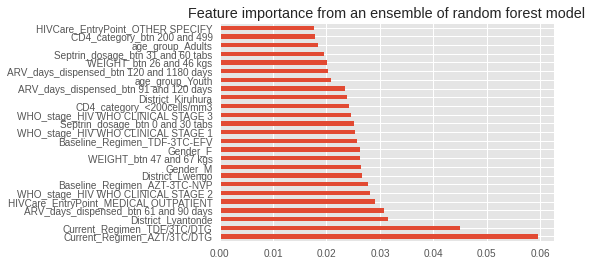

<Figure size 720x576 with 0 Axes>

In [410]:
# plot the graph of feature importances for better visualization 

feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(25).plot(kind='barh',title="Feature importance from an ensemble of random forest model")

plt.figure(figsize=(10,8))
plt.show()

**Arranging the scores of features from random forest in descending order**

In [411]:
df_features=pd.DataFrame(model.feature_importances_)
df_columns=pd.DataFrame(X.columns)
rf_Scores = pd.concat([df_columns,df_features],axis=1)               # feature scores
rf_Scores.columns = ['features','scores']
rf_Scores


# print best features in descending order
RF_scores=rf_Scores.nlargest(90,'scores')
RF_scores

,features,scores
20,Current_Regimen_AZT/3TC/DTG,5.964722e-02
25,Current_Regimen_TDF/3TC/DTG,4.501022e-02
59,District_Lyantonde,3.144583e-02
88,ARV_days_dispensed_btn 61 and 90 days,3.083827e-02
28,HIVCare_EntryPoint_MEDICAL OUTPATIENT,2.901324e-02
50,WHO_stage_HIV WHO CLINICAL STAGE 2,2.816131e-02
7,Baseline_Regimen_AZT-3TC-NVP,2.773014e-02
58,District_Lwengo,2.664920e-02
1,Gender_M,2.643279e-02
74,WEIGHT_btn 47 and 67 kgs,2.635255e-02


**Splitting the data set into train and test data sets**

In [412]:
x=X
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size =0.8,test_size=0.2, random_state =42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((1687, 90), (1687,), (422, 90), (422,))

In [413]:
# instiating the model
Logistic_model=LogisticRegression()
# fitting the model
Logistic_model.fit(x_train,y_train)
Logistic_model

# making predictions
y_pred_logistic=Logistic_model.predict(x_test)

# Confusion matrix
matrix1=confusion_matrix(y_test,y_pred_logistic)
#print(matrix1)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       390
         1.0       0.75      0.19      0.30        32

    accuracy                           0.93       422
   macro avg       0.84      0.59      0.63       422
weighted avg       0.92      0.93      0.91       422



**Handling class imbalance**

In [414]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from pylab import rcParams

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

**Implementing undersampling on the majority class**

In [415]:
#implementing undersampling from the majority class

u_sampled= NearMiss()
x_new,y_new = u_sampled.fit_resample(X,y)

x_new.shape,y_new.shape

((276, 90), (276,))

**Fitting the logistic regression on the undersampled data**

In [416]:
# Splitting the undersampled data set
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_new,y_new,train_size =0.8,test_size=0.2, random_state =42)
x_train_new.shape,y_train_new.shape,x_test_new.shape,y_test_new.shape


((220, 90), (220,), (56, 90), (56,))

In [417]:
# instiating the model
Logistic_model_undersample=LogisticRegression()
# fitting the model
Logistic_model_undersample.fit(x_train_new,y_train_new)
Logistic_model_undersample

# making predictions
y_pred_undersample=Logistic_model_undersample.predict(x_test_new)

# Confusion matrix
matrix_undersample=confusion_matrix(y_test_new,y_pred_undersample)
print(matrix_undersample)
from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred_undersample))

[[23  5]
 [ 9 19]]
              precision    recall  f1-score   support

         0.0       0.72      0.82      0.77        28
         1.0       0.79      0.68      0.73        28

    accuracy                           0.75        56
   macro avg       0.76      0.75      0.75        56
weighted avg       0.76      0.75      0.75        56



**Implementing Oversampling from the minority class for handling class imbalance**

In [418]:
from imblearn.combine import SMOTETomek  #it combines both over and under sampling

smk = SMOTETomek(random_state=42)
x_Tomek,y_Tomek=smk.fit_resample(x,y)

x_Tomek.shape,y_Tomek.shape


((3918, 90), (3918,))

In [419]:
#splitting the data into test and train
x_train_balanced,x_test_balanced,y_train_balanced,y_test_balanced = train_test_split(x_Tomek,y_Tomek,test_size=0.2, random_state=42)

x_train_balanced.shape,x_test_balanced.shape,y_train_balanced.shape,y_test_balanced.shape

((3134, 90), (784, 90), (3134,), (784,))

**Fitting the logistic rgression on balanced data**

In [420]:
# instiating the model
Logistic_model_balanced=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model_balanced.fit(x_train_balanced,y_train_balanced)
Logistic_model_balanced

# making predictions
y_pred_balanced=Logistic_model_balanced.predict(x_test_balanced)

# Confusion matrix
matrix_oversample=confusion_matrix(y_test_balanced,y_pred_balanced)
print(matrix_oversample)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_balanced))


# Confusion report on the train data 

# making predictions
y_pred_train1=Logistic_model_balanced.predict(x_train_balanced)

# Confusion matrix
matrix22=confusion_matrix(y_train_balanced,y_pred_train1)
print(matrix22)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train1))

[[393   4]
 [ 26 361]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       397
         1.0       0.99      0.93      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1555    7]
 [  76 1496]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1562
         1.0       1.00      0.95      0.97      1572

    accuracy                           0.97      3134
   macro avg       0.97      0.97      0.97      3134
weighted avg       0.97      0.97      0.97      3134



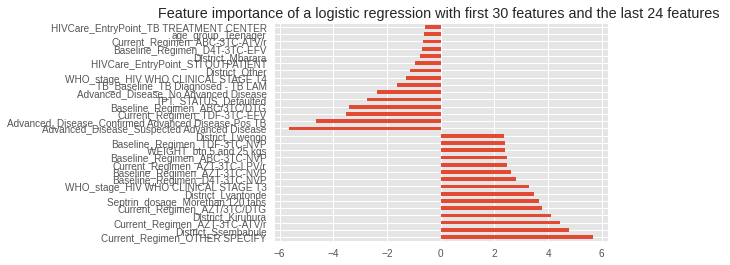

<Figure size 360x360 with 0 Axes>

In [421]:
# feature coefficients
X_colnames = X.columns.values
weights=Logistic_model_balanced.coef_[0]
#print_sorted_feat_importance(weights, X_colnames)


# Feature importance on the logistic regression
logistic_coef = pd.Series(Logistic_model_balanced.coef_[0], index=X.columns)
#logistic_coef.nsmallest(24).plot(kind='barh',title="Feature importance of a logistic regression")
pd.concat([logistic_coef.nlargest(15),logistic_coef.nsmallest(15)]).plot(kind='barh',title="Feature importance of a logistic regression with first 30 features and the last 24 features ")
plt.figure(figsize=(5,5))
plt.show()

In [422]:
pd.concat([logistic_coef.nlargest(20),logistic_coef.nsmallest(20)])

Current_Regimen_OTHER SPECIFY                         5.678385
District_Ssembabule                                   4.764658
Current_Regimen_AZT-3TC-ATV/r                         4.444864
District_Kiruhura                                     4.096193
Current_Regimen_AZT/3TC/DTG                           3.760166
Septrin_dosage_Morethan 120 tabs                      3.669401
District_Lyantonde                                    3.475350
WHO_stage_HIV WHO CLINICAL STAGE T3                   3.271769
Baseline_Regimen_D4T-3TC-NVP                          2.796903
Baseline_Regimen_AZT-3TC-NVP                          2.600106
Current_Regimen_AZT-3TC-LPV/r                         2.464999
Baseline_Regimen_ABC-3TC-NVP                          2.461339
WEIGHT_btn 5 and 25 kgs                               2.410129
Baseline_Regimen_TDF-3TC-NVP                          2.382563
District_Lwengo                                       2.343606
Baseline_Regimen_AZT-3TC-EFV                          2

**The area under the curve of the logistic regression model**

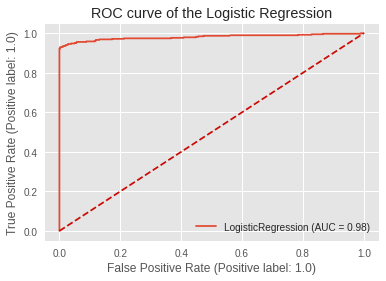

In [423]:
plot_roc_curve(Logistic_model_balanced, x_test_balanced, y_test_balanced)
plt.title('ROC curve of the Logistic Regression')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

**Implementating the KNN Classifier**

In [424]:
# KNN on all features with class imbalance
Knn_classiffier=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier.fit(x_train,y_train)

# making predictions
y_pred_knn=Knn_classiffier.predict(x_test)

# Confusion matrix
matrix4=confusion_matrix(y_test,y_pred_knn)
print(matrix4)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

[[384   6]
 [ 31   1]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       390
         1.0       0.14      0.03      0.05        32

    accuracy                           0.91       422
   macro avg       0.53      0.51      0.50       422
weighted avg       0.87      0.91      0.89       422



In [425]:
# KNN on all features with class balance on oversampled data
Knn_classiffier1=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier1.fit(x_train_balanced,y_train_balanced)

# making predictions
y_pred_knn1=Knn_classiffier1.predict(x_test_balanced)

# Confusion matrix
matrix5=confusion_matrix(y_test_balanced,y_pred_knn1)
print(matrix5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn1))

# Confusion on the train data set
# Confusion report on the train data 

# making predictions
y_pred_train2=Knn_classiffier1.predict(x_train_balanced)

# Confusion matrix
matrix23=confusion_matrix(y_train_balanced,y_pred_train2)
print(matrix23)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train2))

[[391   6]
 [ 28 359]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       397
         1.0       0.98      0.93      0.95       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1561    1]
 [  16 1556]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1562
         1.0       1.00      0.99      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



**The AUC of the KNN classifier**

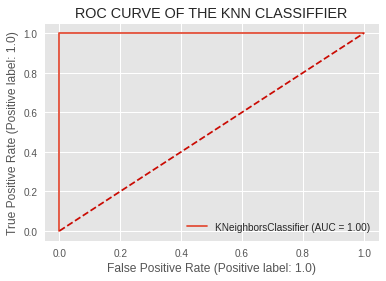

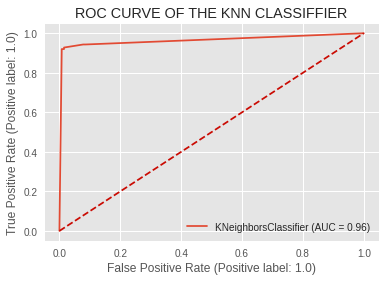

In [426]:
plot_roc_curve(Knn_classiffier1, x_test_balanced, y_pred_knn1)
plt.title('ROC CURVE OF THE KNN CLASSIFFIER')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.show()
plt.show()

plot_roc_curve(Knn_classiffier1, x_test_balanced, y_test_balanced)
plt.title('ROC CURVE OF THE KNN CLASSIFFIER')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.show()
plt.show()

**Decision on the imbalanced data with all features**

In [427]:
# instatiate the model
tree = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree.fit(x_train, y_train)

# making predictions
y_pred_tree=tree.predict(x_test)

# Confusion matrix
matrix6=confusion_matrix(y_test,y_pred_tree)
print(matrix6)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_tree))

[[374  16]
 [ 27   5]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       390
         1.0       0.24      0.16      0.19        32

    accuracy                           0.90       422
   macro avg       0.59      0.56      0.57       422
weighted avg       0.88      0.90      0.89       422



**The tree on mbalanced data set with all features**

In [428]:
# instatiate the model
tree1 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree1.fit(x_train_balanced, y_train_balanced)

# making predictions
y_pred_tree1=tree1.predict(x_test_balanced)

# Confusion matrix
matrix7=confusion_matrix(y_test_balanced,y_pred_tree1)
print(matrix7)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree1))

# Confusion on the train data set
# Confusion report on the train data 

# making predictions
y_pred_train3=tree1.predict(x_train_balanced)

# Confusion matrix
matrix24=confusion_matrix(y_train_balanced,y_pred_train3)
print(matrix24)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train3))


[[376  21]
 [ 22 365]]
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       397
         1.0       0.95      0.94      0.94       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1559    3]
 [  11 1561]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1562
         1.0       1.00      0.99      1.00      1572

    accuracy                           1.00      3134
   macro avg       1.00      1.00      1.00      3134
weighted avg       1.00      1.00      1.00      3134



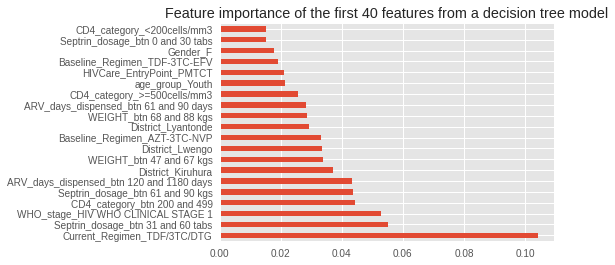

<Figure size 360x360 with 0 Axes>

In [429]:
# Feature importance on the logistic regression
feat_imp3 = pd.Series(tree1.feature_importances_, index=X.columns)
feat_imp3.nlargest(20).plot(kind='barh',title="Feature importance of the first 40 features from a decision tree model")

plt.figure(figsize=(5,5))
plt.show()

**The AUC of the decision tree classifier**

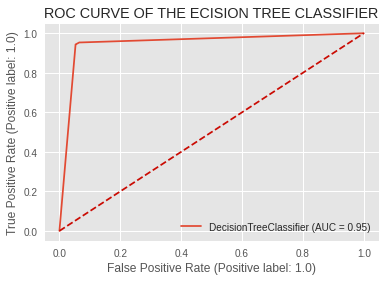

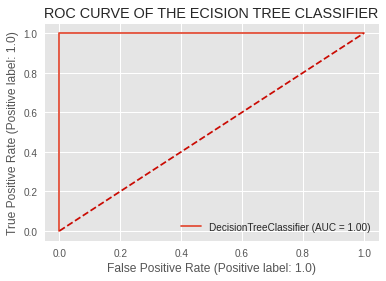

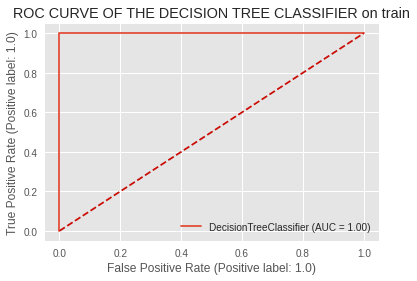

In [430]:
plot_roc_curve(tree1, x_test_balanced, y_test_balanced)
plt.title('ROC CURVE OF THE ECISION TREE CLASSIFIER')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.show()

plot_roc_curve(tree1, x_test_balanced, y_pred_tree1)
plt.title('ROC CURVE OF THE ECISION TREE CLASSIFIER')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.show()

plot_roc_curve(tree1, x_train_balanced, y_pred_train3)
plt.title('ROC CURVE OF THE DECISION TREE CLASSIFIER on train')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.show()

**Implementaing the random forest on imbalanced data set**

In [431]:
rf = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf.fit(x_train,y_train)

# making predictions
y_pred_rf=rf.predict(x_test)

# Confusion matrix
matrix8=confusion_matrix(y_test,y_pred_rf)
print(matrix8)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

[[385   5]
 [ 29   3]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       390
         1.0       0.38      0.09      0.15        32

    accuracy                           0.92       422
   macro avg       0.65      0.54      0.55       422
weighted avg       0.89      0.92      0.90       422



**Random forest on the balanced data set**

In [432]:
rf1 = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf1.fit(x_train_balanced,y_train_balanced)

# making predictions
y_pred_rf1=rf1.predict(x_test_balanced)

# Confusion matrix
matrix9=confusion_matrix(y_test_balanced,y_pred_rf1)
print(matrix9)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf1))


# Confusion report on the train data 

# making predictions
y_pred_train4=rf1.predict(x_train_balanced)

# Confusion matrix
matrix24=confusion_matrix(y_train_balanced,y_pred_train4)
print(matrix24)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train4))

[[391   6]
 [ 22 365]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       397
         1.0       0.98      0.94      0.96       387

    accuracy                           0.96       784
   macro avg       0.97      0.96      0.96       784
weighted avg       0.97      0.96      0.96       784

[[1556    6]
 [   8 1564]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1562
         1.0       1.00      0.99      1.00      1572

    accuracy                           1.00      3134
   macro avg       1.00      1.00      1.00      3134
weighted avg       1.00      1.00      1.00      3134



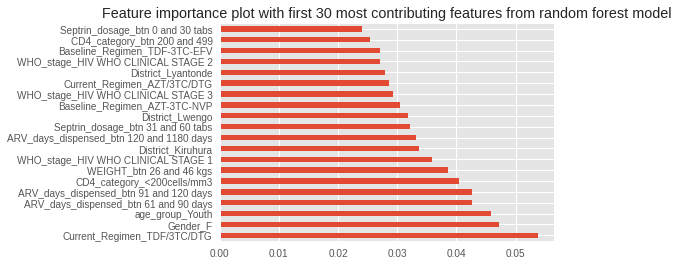

In [433]:
# Feature importance on the random forest
import matplotlib
feat_imp4 = pd.Series(rf1.feature_importances_, index=X.columns)
feat_imp4.nlargest(20).plot(kind='barh',title="Feature importance plot with first 30 most contributing features from random forest model")
matplotlib.rcParams['figure.figsize'] = (5,5)
#plt.figure(figsize=(10,8))
plt.show()

**The AUC of the random forest classifier**

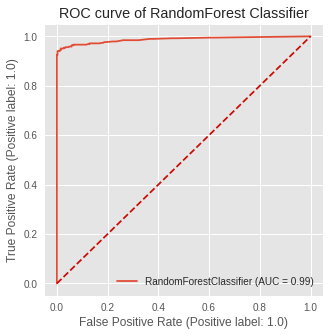

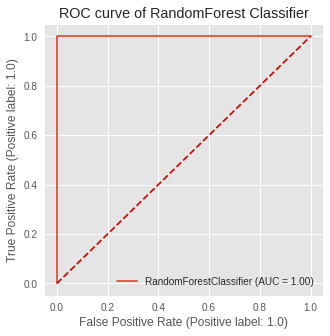

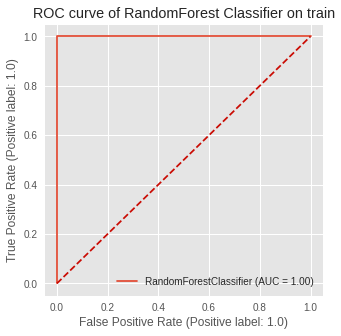

In [434]:
plot_roc_curve(rf1, x_test_balanced, y_test_balanced)

plt.title('ROC curve of RandomForest Classifier')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.show()


plot_roc_curve(rf1, x_test_balanced, y_pred_rf1)

plt.title('ROC curve of RandomForest Classifier')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.show()

plot_roc_curve(rf1, x_train_balanced, y_pred_train4)

plt.title('ROC curve of RandomForest Classifier on train')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.show()


**The support vector machine classifier on balanced data**

In [435]:
svm1 =SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm1.fit(x_train_balanced,y_train_balanced)

# making predictions
y_pred_svm=svm1.predict(x_test_balanced)

# Confusion matrix
matrix10=confusion_matrix(y_test_balanced,y_pred_svm)
print(matrix10)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm))


# Confusion report on the train data 

# making predictions
y_pred_train5=svm1.predict(x_train_balanced)

# Confusion matrix
matrix25=confusion_matrix(y_train_balanced,y_pred_train5)
print(matrix25)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train5))

[[391   6]
 [ 24 363]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       397
         1.0       0.98      0.94      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1561    1]
 [  67 1505]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1562
         1.0       1.00      0.96      0.98      1572

    accuracy                           0.98      3134
   macro avg       0.98      0.98      0.98      3134
weighted avg       0.98      0.98      0.98      3134



**The AUC of the SVM classifier**

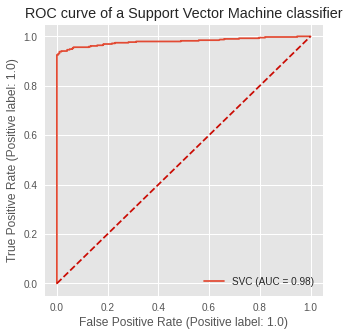

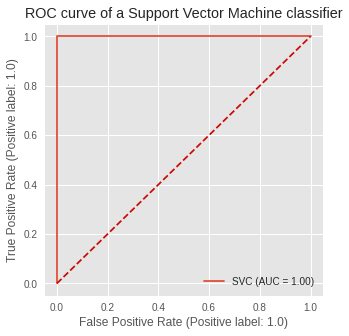

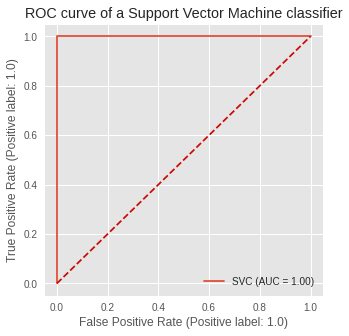

In [436]:
plot_roc_curve(svm1, x_test_balanced, y_test_balanced)
plt.title('ROC curve of a Support Vector Machine classifier')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.show()

plot_roc_curve(svm1, x_test_balanced, y_pred_svm)
plt.title('ROC curve of a Support Vector Machine classifier')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.show()


plot_roc_curve(svm1, x_train_balanced, y_pred_train5)
plt.title('ROC curve of a Support Vector Machine classifier')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.show()

**Combined area under the curves for all models with all features**

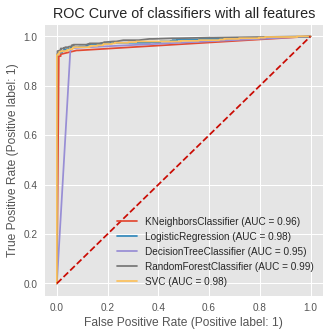

In [437]:
from sklearn.metrics import plot_roc_curve

classifiers = [Knn_classiffier1,Logistic_model_balanced,tree1,rf1,svm1]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test_balanced, y_test_balanced, ax=ax,pos_label=1)

plt.title('Comparing the performance of models with auc under the ROC Curve')

plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC Curve of classifiers with all features")
plt.show()



**Models with significant variables from the logistic regression model**

In [438]:
# selecting the significant features.
selected_train= x_train_balanced.iloc[:, [0,1,15,16,17,18,19,20,21,22,23,24,25,35,36,37,38,39,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,72,73,74,75,76,77,78,79,80,81,82,83,84]]
selected_test= x_test_balanced.iloc[:, [0,1,15,16,17,18,19,20,21,22,23,24,25,35,36,37,38,39,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,72,73,74,75,76,77,78,79,80,81,82,83,84]]

selected_train.shape,y_train_balanced.shape,selected_test.shape,y_test_balanced.shape


((3134, 47), (3134,), (784, 47), (784,))

In [439]:
# instiating the model
Logistic_model2=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model2.fit(selected_train,y_train_balanced)
Logistic_model2

# making predictions
y_pred_logistic2=Logistic_model2.predict(selected_test)

# Confusion matrix
matrix2_1=confusion_matrix(y_test_balanced,y_pred_logistic2)
print(matrix2_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic2))

# Confusion report on the train data 

# making predictions
y_pred_train2=Logistic_model2.predict(selected_train)

# Confusion matrix
matrix44=confusion_matrix(y_train_balanced,y_pred_train1)
print(matrix44)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train2))

[[391   6]
 [ 34 353]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       397
         1.0       0.98      0.91      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1555    7]
 [  76 1496]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1562
         1.0       0.99      0.91      0.95      1572

    accuracy                           0.95      3134
   macro avg       0.95      0.95      0.95      3134
weighted avg       0.95      0.95      0.95      3134



In [440]:
# KNN on  significant features
Knn_classiffier2=KNN(n_neighbors=2, weights ='distance',metric ='minkowski')
Knn_classiffier2.fit(selected_train,y_train_balanced)

# making predictions
y_pred_knn2=Knn_classiffier2.predict(selected_test)

# Confusion matrix
matrix2_2=confusion_matrix(y_test_balanced,y_pred_knn2)
print(matrix2_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn2))

# Confusion report on the train data 

# making predictions
y_pred_train3=Knn_classiffier2.predict(selected_train)

# Confusion matrix
matrix55=confusion_matrix(y_train_balanced,y_pred_train3)
print(matrix55)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train3))


[[390   7]
 [ 30 357]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       397
         1.0       0.98      0.92      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1546   16]
 [  90 1482]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      1562
         1.0       0.99      0.94      0.97      1572

    accuracy                           0.97      3134
   macro avg       0.97      0.97      0.97      3134
weighted avg       0.97      0.97      0.97      3134



In [441]:
# instatiate the model
tree2 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree2.fit(selected_train, y_train_balanced)

# making predictions
y_pred_tree2=tree2.predict(selected_test)

# Confusion matrix
matrix2_3=confusion_matrix(y_test_balanced,y_pred_tree2)
print(matrix2_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree2))


# Confusion report on the train data 

# making predictions
y_pred_train4=tree2.predict(selected_train)

# Confusion matrix
matrix66=confusion_matrix(y_train_balanced,y_pred_train4)
print(matrix66)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train4))

[[377  20]
 [ 31 356]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       397
         1.0       0.95      0.92      0.93       387

    accuracy                           0.93       784
   macro avg       0.94      0.93      0.93       784
weighted avg       0.94      0.93      0.93       784

[[1548   14]
 [  80 1492]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1562
         1.0       0.99      0.95      0.97      1572

    accuracy                           0.97      3134
   macro avg       0.97      0.97      0.97      3134
weighted avg       0.97      0.97      0.97      3134



In [442]:
rf2 =RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf2.fit(selected_train,y_train_balanced)

# making predictions
y_pred_rf2=rf2.predict(selected_test)

# Confusion matrix
matrix2_4=confusion_matrix(y_test_balanced,y_pred_rf2)
print(matrix2_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf2))


# Confusion report on the train data 

# making predictions
y_pred_train5=rf2.predict(selected_train)

# Confusion matrix
matrix77=confusion_matrix(y_train_balanced,y_pred_train5)
print(matrix77)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train5))

[[385  12]
 [ 26 361]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       397
         1.0       0.97      0.93      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1546   16]
 [  78 1494]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1562
         1.0       0.99      0.95      0.97      1572

    accuracy                           0.97      3134
   macro avg       0.97      0.97      0.97      3134
weighted avg       0.97      0.97      0.97      3134



In [443]:
svm2 =SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm2.fit(selected_train,y_train_balanced)

# making predictions
y_pred_svm2=svm2.predict(selected_test)

# Confusion matrix
matrix2_5=confusion_matrix(y_test_balanced,y_pred_svm2)
print(matrix2_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm2))


# Confusion report on the train data 

# making predictions
y_pred_train6=svm2.predict(selected_train)

# Confusion matrix
matrix88=confusion_matrix(y_train_balanced,y_pred_train6)
print(matrix88)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train6))

[[394   3]
 [ 38 349]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       397
         1.0       0.99      0.90      0.94       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1552   10]
 [ 144 1428]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1562
         1.0       0.99      0.91      0.95      1572

    accuracy                           0.95      3134
   macro avg       0.95      0.95      0.95      3134
weighted avg       0.95      0.95      0.95      3134



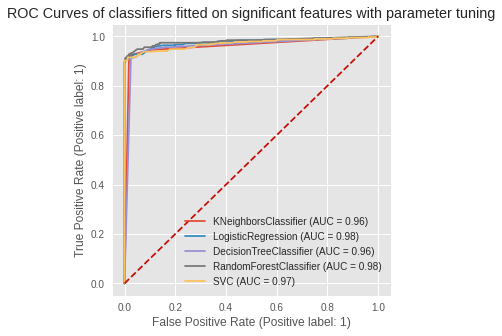

In [444]:
from sklearn.metrics import plot_roc_curve

classifiers = [Knn_classiffier2,Logistic_model2,tree2,rf2,svm2]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, selected_test, y_test_balanced, ax=ax,pos_label=1)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc='best')
plt.title("ROC Curves of classifiers fitted on significant features with parameter tuning")
plt.show()

**Models with the first 20 features in chi square selection**

In [445]:
x_train_chi20=x_train_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78,84,57,14,49,63,85,12,9,21,80]]  
x_test_chi20=x_test_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78,84,57,14,49,63,85,12,9,21,80]]                     

x_train_chi20.shape,y_train_balanced.shape,x_test_chi20.shape,y_test_balanced.shape

((3134, 20), (3134,), (784, 20), (784,))

In [446]:
# instiating the model
Logistic_model3=LogisticRegression(penalty='l2',C=0.001)
# fitting the model
Logistic_model3.fit(x_train_chi20,y_train_balanced)
Logistic_model3

# making predictions
y_pred_logistic3=Logistic_model3.predict(x_test_chi20)

# Confusion matrix
matrix3_1=confusion_matrix(y_test_balanced,y_pred_logistic3)
print(matrix3_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic3))


# Confusion report on the train data 

# making predictions
y_pred_train9_1=Logistic_model3.predict(x_train_chi20)

# Confusion matrix
matrix9_1=confusion_matrix(y_train_balanced,y_pred_train9_1)
print(matrix9_1)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_1))


[[397   0]
 [138 249]]
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85       397
         1.0       1.00      0.64      0.78       387

    accuracy                           0.82       784
   macro avg       0.87      0.82      0.82       784
weighted avg       0.87      0.82      0.82       784

[[1562    0]
 [ 534 1038]]
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.85      1562
         1.0       1.00      0.66      0.80      1572

    accuracy                           0.83      3134
   macro avg       0.87      0.83      0.82      3134
weighted avg       0.87      0.83      0.82      3134



In [447]:
# KNN on all features with class imbalance
Knn_classiffier3=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier3.fit(x_train_chi20,y_train_balanced)

# making predictions
y_pred_knn3=Knn_classiffier3.predict(x_test_chi20)

# Confusion matrix
matrix3_2=confusion_matrix(y_test_balanced,y_pred_knn3)
print(matrix3_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn3))

# Confusion report on the train data 

# making predictions
y_pred_train9_2=Knn_classiffier3.predict(x_train_chi20)

# Confusion matrix
matrix9_2=confusion_matrix(y_train_balanced,y_pred_train9_2)
print(matrix9_1)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_2))

[[390   7]
 [109 278]]
              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87       397
         1.0       0.98      0.72      0.83       387

    accuracy                           0.85       784
   macro avg       0.88      0.85      0.85       784
weighted avg       0.88      0.85      0.85       784

[[1562    0]
 [ 534 1038]]
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88      1562
         1.0       0.98      0.75      0.85      1572

    accuracy                           0.87      3134
   macro avg       0.89      0.87      0.87      3134
weighted avg       0.89      0.87      0.87      3134



In [448]:
# instatiate the model
tree3 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree3.fit(x_train_chi20, y_train_balanced)

# making predictions
y_pred_tree3=tree3.predict(x_test_chi20)

# Confusion matrix
matrix3_3=confusion_matrix(y_test_balanced,y_pred_tree3)
print(matrix3_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree3))

# Confusion report on the train data 

# making predictions
y_pred_train9_3=tree3.predict(x_train_chi20)

# Confusion matrix
matrix9_3=confusion_matrix(y_train_balanced,y_pred_train9_3)
print(matrix9_3)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_3))


[[380  17]
 [104 283]]
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.86       397
         1.0       0.94      0.73      0.82       387

    accuracy                           0.85       784
   macro avg       0.86      0.84      0.84       784
weighted avg       0.86      0.85      0.84       784

[[1531   31]
 [ 362 1210]]
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      1562
         1.0       0.98      0.77      0.86      1572

    accuracy                           0.87      3134
   macro avg       0.89      0.87      0.87      3134
weighted avg       0.89      0.87      0.87      3134



In [449]:
rf3 = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf3.fit(x_train_chi20,y_train_balanced)

# making predictions
y_pred_rf3=rf3.predict(x_test_chi20)

# Confusion matrix
matrix3_4=confusion_matrix(y_test_balanced,y_pred_rf3)
print(matrix3_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf3))

# Confusion report on the train data 

# making predictions
y_pred_train9_4=rf3.predict(x_train_chi20)

# Confusion matrix
matrix9_4=confusion_matrix(y_train_balanced,y_pred_train9_4)
print(matrix9_4)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_4))

[[345  52]
 [ 54 333]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       397
         1.0       0.86      0.86      0.86       387

    accuracy                           0.86       784
   macro avg       0.86      0.86      0.86       784
weighted avg       0.86      0.86      0.86       784

[[1366  196]
 [ 199 1373]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1562
         1.0       0.88      0.87      0.87      1572

    accuracy                           0.87      3134
   macro avg       0.87      0.87      0.87      3134
weighted avg       0.87      0.87      0.87      3134



In [450]:
svm3 =SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm3.fit(x_train_chi20,y_train_balanced)

# making predictions
y_pred_svm3=svm3.predict(x_test_chi20)

# Confusion matrix
matrix3_5=confusion_matrix(y_test_balanced,y_pred_svm3)
print(matrix3_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm3))

# Confusion report on the train data 

# making predictions
y_pred_train9_5=svm3.predict(x_train_chi20)

# Confusion matrix
matrix9_5=confusion_matrix(y_train_balanced,y_pred_train9_5)
print(matrix9_5)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_5))

[[389   8]
 [108 279]]
              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87       397
         1.0       0.97      0.72      0.83       387

    accuracy                           0.85       784
   macro avg       0.88      0.85      0.85       784
weighted avg       0.88      0.85      0.85       784

[[1539   23]
 [ 408 1164]]
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88      1562
         1.0       0.98      0.74      0.84      1572

    accuracy                           0.86      3134
   macro avg       0.89      0.86      0.86      3134
weighted avg       0.89      0.86      0.86      3134



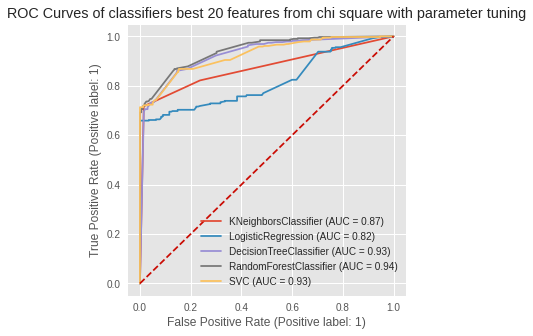

In [451]:
from sklearn.metrics import plot_roc_curve

classifiers3 = [Knn_classiffier3,Logistic_model3,tree3,rf3,svm3]
ax = plt.gca()
for i in classifiers3:
    plot_roc_curve(i, x_test_chi20, y_test_balanced, ax=ax,pos_label=1)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 20 features from chi square with parameter tuning")
plt.show()

**Models on the first 10 selected features from the chisquare**

In [452]:
x_train_chi10=x_train_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78]]  
x_test_chi10=x_test_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78]] 

x_train_chi10.shape,y_train_balanced.shape,x_test_chi10.shape,y_test_balanced.shape

((3134, 10), (3134,), (784, 10), (784,))

In [453]:
# instiating the model
Logistic_model4=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model4.fit(x_train_chi10,y_train_balanced)
Logistic_model4

# making predictions
y_pred_logistic4=Logistic_model4.predict(x_test_chi10)

# Confusion matrix
matrix4_1=confusion_matrix(y_test_balanced,y_pred_logistic4)
print(matrix4_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic4))

# Confusion report on the train data 

# making predictions
y_pred_train9_6=Logistic_model4.predict(x_train_chi10)

# Confusion matrix
matrix9_6=confusion_matrix(y_train_balanced,y_pred_train9_6)
print(matrix9_6)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_6))

[[370  27]
 [190 197]]
              precision    recall  f1-score   support

         0.0       0.66      0.93      0.77       397
         1.0       0.88      0.51      0.64       387

    accuracy                           0.72       784
   macro avg       0.77      0.72      0.71       784
weighted avg       0.77      0.72      0.71       784

[[1489   73]
 [ 781  791]]
              precision    recall  f1-score   support

         0.0       0.66      0.95      0.78      1562
         1.0       0.92      0.50      0.65      1572

    accuracy                           0.73      3134
   macro avg       0.79      0.73      0.71      3134
weighted avg       0.79      0.73      0.71      3134



In [454]:
# KNN on all features with class imbalance
Knn_classiffier4=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier4.fit(x_train_chi10,y_train_balanced)

# making predictions
y_pred_knn4=Knn_classiffier4.predict(x_test_chi10)

# Confusion matrix
matrix4_2=confusion_matrix(y_test_balanced,y_pred_knn4)
print(matrix4_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn4))

# Confusion report on the train data 

# making predictions
y_pred_train9_7=Knn_classiffier4.predict(x_train_chi10)

# Confusion matrix
matrix9_7=confusion_matrix(y_train_balanced,y_pred_train9_7)
print(matrix9_7)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_7))

[[154 243]
 [131 256]]
              precision    recall  f1-score   support

         0.0       0.54      0.39      0.45       397
         1.0       0.51      0.66      0.58       387

    accuracy                           0.52       784
   macro avg       0.53      0.52      0.51       784
weighted avg       0.53      0.52      0.51       784

[[ 570  992]
 [ 528 1044]]
              precision    recall  f1-score   support

         0.0       0.52      0.36      0.43      1562
         1.0       0.51      0.66      0.58      1572

    accuracy                           0.51      3134
   macro avg       0.52      0.51      0.50      3134
weighted avg       0.52      0.51      0.50      3134



In [455]:
# instatiate the model
tree4 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree4.fit(x_train_chi10, y_train_balanced)

# making predictions
y_pred_tree4=tree4.predict(x_test_chi10)

# Confusion matrix
matrix4_3=confusion_matrix(y_test_balanced,y_pred_tree4)
print(matrix4_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree4))


# Confusion report on the train data 

# making predictions
y_pred_train9_8=tree4.predict(x_train_chi10)

# Confusion matrix
matrix9_8=confusion_matrix(y_train_balanced,y_pred_train9_8)
print(matrix9_8)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_8))

[[370  27]
 [175 212]]
              precision    recall  f1-score   support

         0.0       0.68      0.93      0.79       397
         1.0       0.89      0.55      0.68       387

    accuracy                           0.74       784
   macro avg       0.78      0.74      0.73       784
weighted avg       0.78      0.74      0.73       784

[[1492   70]
 [ 728  844]]
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79      1562
         1.0       0.92      0.54      0.68      1572

    accuracy                           0.75      3134
   macro avg       0.80      0.75      0.73      3134
weighted avg       0.80      0.75      0.73      3134



In [456]:
rf4 = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf4.fit(x_train_chi10,y_train_balanced)

# making predictions
y_pred_rf4=rf4.predict(x_test_chi10)

# Confusion matrix
matrix4_4=confusion_matrix(y_test_balanced,y_pred_rf4)
print(matrix4_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf4))


# Confusion report on the train data 

# making predictions
y_pred_train9_9=rf4.predict(x_train_chi10)

# Confusion matrix
matrix9_9=confusion_matrix(y_train_balanced,y_pred_train9_9)
print(matrix9_9)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_9))

[[369  28]
 [175 212]]
              precision    recall  f1-score   support

         0.0       0.68      0.93      0.78       397
         1.0       0.88      0.55      0.68       387

    accuracy                           0.74       784
   macro avg       0.78      0.74      0.73       784
weighted avg       0.78      0.74      0.73       784

[[1492   70]
 [ 728  844]]
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79      1562
         1.0       0.92      0.54      0.68      1572

    accuracy                           0.75      3134
   macro avg       0.80      0.75      0.73      3134
weighted avg       0.80      0.75      0.73      3134



In [457]:
svm4=SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm4.fit(x_train_chi10,y_train_balanced)

# making predictions
y_pred_svm4=svm4.predict(x_test_chi10)

# Confusion matrix
matrix4_5=confusion_matrix(y_test_balanced,y_pred_svm4)
print(matrix4_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm4))


# Confusion report on the train data 

# making predictions
y_pred_train9_10=svm4.predict(x_train_chi10)

# Confusion matrix
matrix9_10=confusion_matrix(y_train_balanced,y_pred_train9_10)
print(matrix9_10)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_10))

[[372  25]
 [179 208]]
              precision    recall  f1-score   support

         0.0       0.68      0.94      0.78       397
         1.0       0.89      0.54      0.67       387

    accuracy                           0.74       784
   macro avg       0.78      0.74      0.73       784
weighted avg       0.78      0.74      0.73       784

[[1491   71]
 [ 754  818]]
              precision    recall  f1-score   support

         0.0       0.66      0.95      0.78      1562
         1.0       0.92      0.52      0.66      1572

    accuracy                           0.74      3134
   macro avg       0.79      0.74      0.72      3134
weighted avg       0.79      0.74      0.72      3134



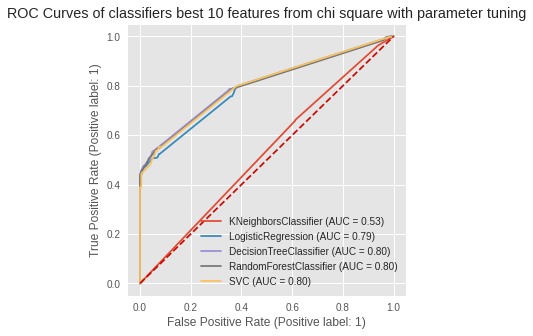

In [458]:
from sklearn.metrics import plot_roc_curve

classifiers4 = [Knn_classiffier4,Logistic_model4,tree4,rf4,svm4]
ax = plt.gca()
for i in classifiers4:
    plot_roc_curve(i, x_test_chi10, y_test_balanced, ax=ax,pos_label=1)
    
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 10 features from chi square with parameter tuning")
plt.show()

**The models on the first 30 features selected from the chisquare**

In [459]:
x_train_chi30=x_train_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78,84,57,14,49,63,85,12,9,21,80,1,83,2,50,69,0,45,79,86,51]]  
x_test_chi30=x_test_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78,84,57,14,49,63,85,12,9,21,80,1,83,2,50,69,0,45,79,86,51]] 

x_train_chi30.shape,y_train_balanced.shape,x_test_chi30.shape,y_test_balanced.shape

((3134, 30), (3134,), (784, 30), (784,))

In [460]:
# instiating the model
Logistic_model5=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model5.fit(x_train_chi30,y_train_balanced)
Logistic_model5

# making predictions
y_pred_logistic5=Logistic_model5.predict(x_test_chi30)

# Confusion matrix
matrix5_1=confusion_matrix(y_test_balanced,y_pred_logistic5)
print(matrix5_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic5))

# Confusion report on the train data 

# making predictions
y_pred_train9_11=Logistic_model5.predict(x_train_chi30)

# Confusion matrix
matrix9_11=confusion_matrix(y_train_balanced,y_pred_train9_11)
print(matrix9_11)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_11))

[[393   4]
 [ 59 328]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       397
         1.0       0.99      0.85      0.91       387

    accuracy                           0.92       784
   macro avg       0.93      0.92      0.92       784
weighted avg       0.93      0.92      0.92       784

[[1550   12]
 [ 222 1350]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      1562
         1.0       0.99      0.86      0.92      1572

    accuracy                           0.93      3134
   macro avg       0.93      0.93      0.93      3134
weighted avg       0.93      0.93      0.93      3134



In [461]:
# KNN on all features with class imbalance
Knn_classiffier5=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier5.fit(x_train_chi30,y_train_balanced)

# making predictions
y_pred_knn5=Knn_classiffier5.predict(x_test_chi30)

# Confusion matrix
matrix5_2=confusion_matrix(y_test_balanced,y_pred_knn5)
print(matrix5_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn5))

# Confusion report on the train data 

# making predictions
y_pred_train9_12=Knn_classiffier5.predict(x_train_chi30)

# Confusion matrix
matrix9_12=confusion_matrix(y_train_balanced,y_pred_train9_12)
print(matrix9_12)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_12))

[[393   4]
 [ 50 337]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       397
         1.0       0.99      0.87      0.93       387

    accuracy                           0.93       784
   macro avg       0.94      0.93      0.93       784
weighted avg       0.94      0.93      0.93       784

[[1560    2]
 [ 170 1402]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1562
         1.0       1.00      0.89      0.94      1572

    accuracy                           0.95      3134
   macro avg       0.95      0.95      0.94      3134
weighted avg       0.95      0.95      0.94      3134



In [462]:
# instatiate the model
tree5 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree5.fit(x_train_chi30, y_train_balanced)

# making predictions
y_pred_tree5=tree5.predict(x_test_chi30)

# Confusion matrix
matrix5_3=confusion_matrix(y_test_balanced,y_pred_tree5)
print(matrix5_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree5))

# Confusion report on the train data 

# making predictions
y_pred_train9_13=tree5.predict(x_train_chi30)

# Confusion matrix
matrix9_13=confusion_matrix(y_train_balanced,y_pred_train9_13)
print(matrix9_13)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_13))

[[383  14]
 [ 42 345]]
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       397
         1.0       0.96      0.89      0.92       387

    accuracy                           0.93       784
   macro avg       0.93      0.93      0.93       784
weighted avg       0.93      0.93      0.93       784

[[1528   34]
 [ 130 1442]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1562
         1.0       0.98      0.92      0.95      1572

    accuracy                           0.95      3134
   macro avg       0.95      0.95      0.95      3134
weighted avg       0.95      0.95      0.95      3134



In [463]:
rf5 = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf5.fit(x_train_chi30,y_train_balanced)

# making predictions
y_pred_rf5=rf5.predict(x_test_chi30)

# Confusion matrix
matrix5_4=confusion_matrix(y_test_balanced,y_pred_rf5)
print(matrix5_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf5))

# Confusion report on the train data 

# making predictions
y_pred_train9_14=tree5.predict(x_train_chi30)

# Confusion matrix
matrix9_14=confusion_matrix(y_train_balanced,y_pred_train9_14)
print(matrix9_14)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_14))

[[380  17]
 [ 34 353]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       397
         1.0       0.95      0.91      0.93       387

    accuracy                           0.93       784
   macro avg       0.94      0.93      0.93       784
weighted avg       0.94      0.93      0.93       784

[[1528   34]
 [ 130 1442]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1562
         1.0       0.98      0.92      0.95      1572

    accuracy                           0.95      3134
   macro avg       0.95      0.95      0.95      3134
weighted avg       0.95      0.95      0.95      3134



In [464]:
svm5 =SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm5.fit(x_train_chi30,y_train_balanced)

# making predictions
y_pred_svm5=svm5.predict(x_test_chi30)

# Confusion matrix
matrix5_5=confusion_matrix(y_test_balanced,y_pred_svm5)
print(matrix5_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm5))

# Confusion report on the train data 

# making predictions
y_pred_train9_15=svm5.predict(x_train_chi30)

# Confusion matrix
matrix9_15=confusion_matrix(y_train_balanced,y_pred_train9_15)
print(matrix9_15)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_15))

[[394   3]
 [ 61 326]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92       397
         1.0       0.99      0.84      0.91       387

    accuracy                           0.92       784
   macro avg       0.93      0.92      0.92       784
weighted avg       0.93      0.92      0.92       784

[[1552   10]
 [ 221 1351]]
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      1562
         1.0       0.99      0.86      0.92      1572

    accuracy                           0.93      3134
   macro avg       0.93      0.93      0.93      3134
weighted avg       0.93      0.93      0.93      3134



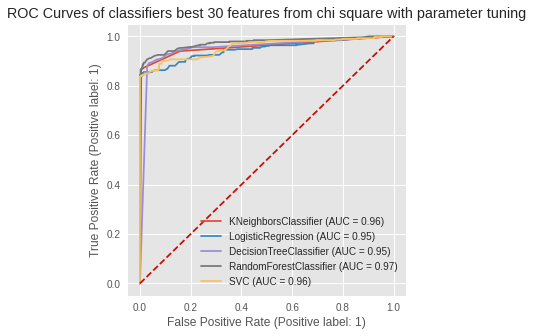

In [465]:
from sklearn.metrics import plot_roc_curve

classifiers5 = [Knn_classiffier5,Logistic_model5,tree5,rf5,svm5]
ax = plt.gca()
for i in classifiers5:
    plot_roc_curve(i, x_test_chi30, y_test_balanced, ax=ax,pos_label=1)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 30 features from chi square with parameter tuning")
plt.show()

**The models on the first 40 features selected from chi square**

In [466]:
x_train_chi40=x_train_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78,84,57,14,49,63,85,12,9,21,80,1,83,2,50,69,0,45,79,86,51,53,74,89,15,71,52,11,22,64,55]]  
x_test_chi40=x_test_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78,84,57,14,49,63,85,12,9,21,80,1,83,2,50,69,0,45,79,86,51,53,74,89,15,71,52,11,22,64,55]] 


x_train_chi40.shape,y_train_balanced.shape,x_test_chi40.shape,y_test_balanced.shape

((3134, 40), (3134,), (784, 40), (784,))

In [467]:
# instiating the model
Logistic_model6=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model6.fit(x_train_chi40,y_train_balanced)
Logistic_model6

# making predictions
y_pred_logistic6=Logistic_model6.predict(x_test_chi40)

# Confusion matrix
matrix6_1=confusion_matrix(y_test_balanced,y_pred_logistic6)
print(matrix6_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic6))

# Confusion report on the train data 

# making predictions
y_pred_train9_16=Logistic_model6.predict(x_train_chi40)

# Confusion matrix
matrix9_16=confusion_matrix(y_train_balanced,y_pred_train9_16)
print(matrix9_16)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_16))

[[393   4]
 [ 40 347]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       397
         1.0       0.99      0.90      0.94       387

    accuracy                           0.94       784
   macro avg       0.95      0.94      0.94       784
weighted avg       0.95      0.94      0.94       784

[[1548   14]
 [ 159 1413]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1562
         1.0       0.99      0.90      0.94      1572

    accuracy                           0.94      3134
   macro avg       0.95      0.94      0.94      3134
weighted avg       0.95      0.94      0.94      3134



In [468]:
# KNN on all features with class imbalance
Knn_classiffier6=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier6.fit(x_train_chi40,y_train_balanced)

# making predictions
y_pred_knn6=Knn_classiffier6.predict(x_test_chi40)

# Confusion matrix
matrix6_2=confusion_matrix(y_test_balanced,y_pred_knn6)
print(matrix6_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn6))

# Confusion report on the train data 

# making predictions
y_pred_train9_17=Knn_classiffier6.predict(x_train_chi40)

# Confusion matrix
matrix9_17=confusion_matrix(y_train_balanced,y_pred_train9_17)
print(matrix9_17)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_17))

[[390   7]
 [ 34 353]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       397
         1.0       0.98      0.91      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1550   12]
 [  80 1492]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1562
         1.0       0.99      0.95      0.97      1572

    accuracy                           0.97      3134
   macro avg       0.97      0.97      0.97      3134
weighted avg       0.97      0.97      0.97      3134



In [469]:
# instatiate the model
tree6 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree6.fit(x_train_chi40, y_train_balanced)

# making predictions
y_pred_tree6=tree6.predict(x_test_chi40)

# Confusion matrix
matrix5_3=confusion_matrix(y_test_balanced,y_pred_tree6)
print(matrix5_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree6))

# Confusion report on the train data 

# making predictions
y_pred_train9_18=tree6.predict(x_train_chi40)

# Confusion matrix
matrix9_18=confusion_matrix(y_train_balanced,y_pred_train9_18)
print(matrix9_18)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_18))

[[370  27]
 [ 25 362]]
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       397
         1.0       0.93      0.94      0.93       387

    accuracy                           0.93       784
   macro avg       0.93      0.93      0.93       784
weighted avg       0.93      0.93      0.93       784

[[1517   45]
 [  32 1540]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1562
         1.0       0.97      0.98      0.98      1572

    accuracy                           0.98      3134
   macro avg       0.98      0.98      0.98      3134
weighted avg       0.98      0.98      0.98      3134



In [470]:
rf6 = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf6.fit(x_train_chi40,y_train_balanced)

# making predictions
y_pred_rf6=rf6.predict(x_test_chi40)

# Confusion matrix
matrix6_4=confusion_matrix(y_test_balanced,y_pred_rf6)
print(matrix6_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf6))


# Confusion report on the train data 

# making predictions
y_pred_train9_19=rf6.predict(x_train_chi40)

# Confusion matrix
matrix9_19=confusion_matrix(y_train_balanced,y_pred_train9_19)
print(matrix9_19)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_19))

[[385  12]
 [ 20 367]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       397
         1.0       0.97      0.95      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1515   47]
 [  30 1542]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1562
         1.0       0.97      0.98      0.98      1572

    accuracy                           0.98      3134
   macro avg       0.98      0.98      0.98      3134
weighted avg       0.98      0.98      0.98      3134



In [471]:
svm6=SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm6.fit(x_train_chi40,y_train_balanced)

# making predictions
y_pred_svm6=svm6.predict(x_test_chi40)

# Confusion matrix
matrix6_5=confusion_matrix(y_test_balanced,y_pred_svm6)
print(matrix6_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm6))

# Confusion report on the train data 

# making predictions
y_pred_train9_20=svm6.predict(x_train_chi40)

# Confusion matrix
matrix9_20=confusion_matrix(y_train_balanced,y_pred_train9_20)
print(matrix9_20)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_20))

[[393   4]
 [ 40 347]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       397
         1.0       0.99      0.90      0.94       387

    accuracy                           0.94       784
   macro avg       0.95      0.94      0.94       784
weighted avg       0.95      0.94      0.94       784

[[1552   10]
 [ 150 1422]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1562
         1.0       0.99      0.90      0.95      1572

    accuracy                           0.95      3134
   macro avg       0.95      0.95      0.95      3134
weighted avg       0.95      0.95      0.95      3134



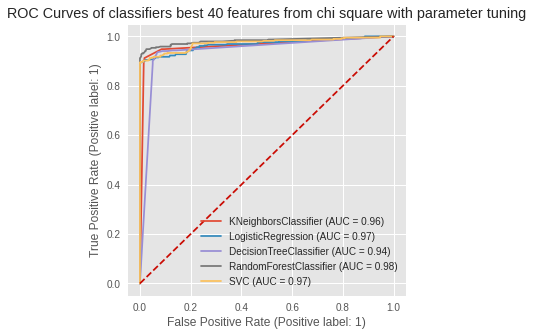

In [472]:
from sklearn.metrics import plot_roc_curve

classifiers6 = [Knn_classiffier6,Logistic_model6,tree6,rf6,svm6]
ax = plt.gca()
for i in classifiers6:
    plot_roc_curve(i, x_test_chi40, y_test_balanced, ax=ax,pos_label=1)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 40 features from chi square with parameter tuning")
plt.show()
    

**Models with first45 features selected from the chisquare**

In [473]:
x_train_chi45=x_train_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78,84,57,14,49,63,85,12,9,21,80,1,83,2,50,69,0,45,79,86,51,53,74,89,15,71,52,11,22,64,55,42,29,3,27,73]]  
x_test_chi45=x_test_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78,84,57,14,49,63,85,12,9,21,80,1,83,2,50,69,0,45,79,86,51,53,74,89,15,71,52,11,22,64,55,42,29,3,27,73]] 



In [474]:
# instiating the model
Logistic_model45_1=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model45_1.fit(x_train_chi45,y_train_balanced)
Logistic_model45_1

# making predictions
y_pred_logistic45_1=Logistic_model45_1.predict(x_test_chi45)

# Confusion matrix
matrix45_1=confusion_matrix(y_test_balanced,y_pred_logistic45_1)
print(matrix45_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic45_1))

# Confusion report on the train data 

# making predictions
y_pred_train45_1=Logistic_model45_1.predict(x_train_chi45)

# Confusion matrix
matrix45_1=confusion_matrix(y_train_balanced,y_pred_train45_1)
print(matrix45_1)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train45_1))

[[392   5]
 [ 36 351]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       397
         1.0       0.99      0.91      0.94       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1549   13]
 [ 138 1434]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1562
         1.0       0.99      0.91      0.95      1572

    accuracy                           0.95      3134
   macro avg       0.95      0.95      0.95      3134
weighted avg       0.95      0.95      0.95      3134



In [475]:
# KNN on all features with class imbalance
Knn_classiffier45_2=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier45_2.fit(x_train_chi45,y_train_balanced)

# making predictions
y_pred_knn45_2=Knn_classiffier45_2.predict(x_test_chi45)

# Confusion matrix
matrix45_2=confusion_matrix(y_test_balanced,y_pred_knn45_2)
print(matrix45_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn45_2))

# Confusion report on the train data 

# making predictions
y_pred_train45_2=Knn_classiffier45_2.predict(x_train_chi45)

# Confusion matrix
matrix45_2=confusion_matrix(y_train_balanced,y_pred_train45_2)
print(matrix45_2)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train45_2))

[[386  11]
 [ 26 361]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       397
         1.0       0.97      0.93      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1548   14]
 [  41 1531]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1562
         1.0       0.99      0.97      0.98      1572

    accuracy                           0.98      3134
   macro avg       0.98      0.98      0.98      3134
weighted avg       0.98      0.98      0.98      3134



In [476]:
# instatiate the model
tree45_3 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree45_3.fit(x_train_chi45, y_train_balanced)

# making predictions
y_pred_tree45_3=tree45_3.predict(x_test_chi45)

# Confusion matrix
matrix45_3=confusion_matrix(y_test_balanced,y_pred_tree45_3)
print(matrix45_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree45_3))

# Confusion report on the train data 

# making predictions
y_pred_train45_3=tree45_3.predict(x_train_chi45)

# Confusion matrix
matrix45_3=confusion_matrix(y_train_balanced,y_pred_train45_3)
print(matrix45_3)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train45_3))

[[369  28]
 [ 19 368]]
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       397
         1.0       0.93      0.95      0.94       387

    accuracy                           0.94       784
   macro avg       0.94      0.94      0.94       784
weighted avg       0.94      0.94      0.94       784

[[1538   24]
 [  27 1545]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1562
         1.0       0.98      0.98      0.98      1572

    accuracy                           0.98      3134
   macro avg       0.98      0.98      0.98      3134
weighted avg       0.98      0.98      0.98      3134



In [477]:
rf45_4 = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf45_4.fit(x_train_chi45,y_train_balanced)

# making predictions
y_pred_rf45_4=rf45_4.predict(x_test_chi45)

# Confusion matrix
matrix45_4=confusion_matrix(y_test_balanced,y_pred_rf45_4)
print(matrix45_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf45_4))


# Confusion report on the train data 

# making predictions
y_pred_train45_4=rf45_4.predict(x_train_chi45)

# Confusion matrix
matrix45_4=confusion_matrix(y_train_balanced,y_pred_train45_4)
print(matrix45_4)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train45_4))

[[386  11]
 [ 19 368]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       397
         1.0       0.97      0.95      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1537   25]
 [  26 1546]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1562
         1.0       0.98      0.98      0.98      1572

    accuracy                           0.98      3134
   macro avg       0.98      0.98      0.98      3134
weighted avg       0.98      0.98      0.98      3134



In [478]:
svm45_5=SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm45_5.fit(x_train_chi45,y_train_balanced)

# making predictions
y_pred_svm45_5=svm45_5.predict(x_test_chi45)

# Confusion matrix
matrix45_5=confusion_matrix(y_test_balanced,y_pred_svm45_5)
print(matrix45_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm45_5))

# Confusion report on the train data 

# making predictions
y_pred_train45_5=svm45_5.predict(x_train_chi45)

# Confusion matrix
matrix45_5=confusion_matrix(y_train_balanced,y_pred_train45_5)
print(matrix45_5)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train45_5))

[[393   4]
 [ 36 351]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       397
         1.0       0.99      0.91      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1552   10]
 [ 134 1438]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      1562
         1.0       0.99      0.91      0.95      1572

    accuracy                           0.95      3134
   macro avg       0.96      0.95      0.95      3134
weighted avg       0.96      0.95      0.95      3134



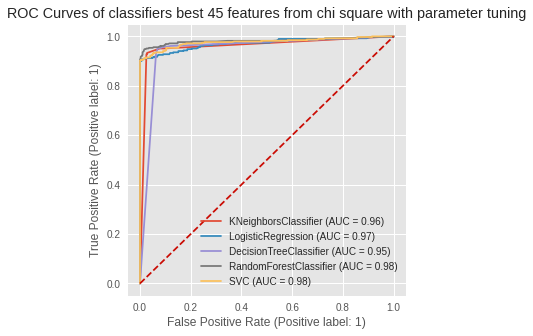

In [479]:
from sklearn.metrics import plot_roc_curve

classifiers45_1 = [Knn_classiffier45_2,Logistic_model45_1,tree45_3,rf45_4,svm45_5]
ax = plt.gca()
for i in classifiers45_1:
    plot_roc_curve(i, x_test_chi45, y_test_balanced, ax=ax,pos_label=1)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 45 features from chi square with parameter tuning")
plt.show()

**Models with the first 50 features selected from the chisquare**

In [480]:
x_train_chi50=x_train_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78,84,57,14,49,63,85,12,9,21,80,1,83,2,50,69,0,45,79,86,51,53,74,89,15,71,52,11,22,64,55,42,29,3,27,73,58,7,68,35,4]]  
x_test_chi50=x_test_balanced.iloc[:, [20,75,17,82,18,66,37,19,25,78,84,57,14,49,63,85,12,9,21,80,1,83,2,50,69,0,45,79,86,51,53,74,89,15,71,52,11,22,64,55,42,29,3,27,73,58,7,68,35,4]]



In [481]:
# instiating the model
Logistic_model50_1=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model50_1.fit(x_train_chi50,y_train_balanced)
Logistic_model50_1

# making predictions
y_pred_logistic50_1=Logistic_model50_1.predict(x_test_chi50)

# Confusion matrix
matrix50_1=confusion_matrix(y_test_balanced,y_pred_logistic50_1)
print(matrix50_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic50_1))

# Confusion report on the train data 

# making predictions
y_pred_train50_1=Logistic_model50_1.predict(x_train_chi50)

# Confusion matrix
matrix50=confusion_matrix(y_train_balanced,y_pred_train50_1)
print(matrix50)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train50_1))

[[396   1]
 [ 34 353]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       397
         1.0       1.00      0.91      0.95       387

    accuracy                           0.96       784
   macro avg       0.96      0.95      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1549   13]
 [ 120 1452]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1562
         1.0       0.99      0.92      0.96      1572

    accuracy                           0.96      3134
   macro avg       0.96      0.96      0.96      3134
weighted avg       0.96      0.96      0.96      3134



In [482]:
# KNN on all features with class imbalance
Knn_classiffier50_2=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier50_2.fit(x_train_chi50,y_train_balanced)

# making predictions
y_pred_knn50_2=Knn_classiffier50_2.predict(x_test_chi50)

# Confusion matrix
matrix50_2=confusion_matrix(y_test_balanced,y_pred_knn50_2)
print(matrix50_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn50_2))

# Confusion report on the train data 

# making predictions
y_pred_train50_2=Knn_classiffier50_2.predict(x_train_chi50)

# Confusion matrix
matrix50_2=confusion_matrix(y_train_balanced,y_pred_train50_2)
print(matrix50_2)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train50_2))

[[387  10]
 [ 29 358]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       397
         1.0       0.97      0.93      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1558    4]
 [  37 1535]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1562
         1.0       1.00      0.98      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



In [483]:
# instatiate the model
tree50_3 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree50_3.fit(x_train_chi50, y_train_balanced)

# making predictions
y_pred_tree50_3=tree50_3.predict(x_test_chi50)

# Confusion matrix
matrix50_3=confusion_matrix(y_test_balanced,y_pred_tree50_3)
print(matrix50_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree50_3))

# Confusion report on the train data 

# making predictions
y_pred_train50_3=tree50_3.predict(x_train_chi50)

# Confusion matrix
matrix501=confusion_matrix(y_train_balanced,y_pred_train50_3)
print(matrix501)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train50_3))

[[374  23]
 [ 28 359]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       397
         1.0       0.94      0.93      0.93       387

    accuracy                           0.93       784
   macro avg       0.94      0.93      0.93       784
weighted avg       0.94      0.93      0.93       784

[[1554    8]
 [  27 1545]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1562
         1.0       0.99      0.98      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



In [484]:
rf50_4 = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf50_4.fit(x_train_chi50,y_train_balanced)

# making predictions
y_pred_rf50_4=rf50_4.predict(x_test_chi50)

# Confusion matrix
matrix502=confusion_matrix(y_test_balanced,y_pred_rf50_4)
print(matrix502)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf50_4))


# Confusion report on the train data 

# making predictions
y_pred_train50_4=rf50_4.predict(x_train_chi50)

# Confusion matrix
matrix90=confusion_matrix(y_train_balanced,y_pred_train50_4)
print(matrix90)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train50_4))

[[388   9]
 [ 21 366]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       397
         1.0       0.98      0.95      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1553    9]
 [  27 1545]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1562
         1.0       0.99      0.98      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



In [485]:
svm50_5=SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm50_5.fit(x_train_chi50,y_train_balanced)

# making predictions
y_pred_svm50_5=svm50_5.predict(x_test_chi50)

# Confusion matrix
matrix60=confusion_matrix(y_test_balanced,y_pred_svm50_5)
print(matrix60)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm50_5))

# Confusion report on the train data 

# making predictions
y_pred_train50_5=svm50_5.predict(x_train_chi50)

# Confusion matrix
matrix601=confusion_matrix(y_train_balanced,y_pred_train50_5)
print(matrix601)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train50_5))

[[393   4]
 [ 35 352]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       397
         1.0       0.99      0.91      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1555    7]
 [ 114 1458]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1562
         1.0       1.00      0.93      0.96      1572

    accuracy                           0.96      3134
   macro avg       0.96      0.96      0.96      3134
weighted avg       0.96      0.96      0.96      3134



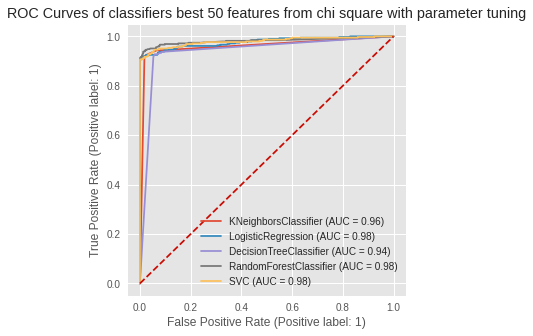

In [486]:
from sklearn.metrics import plot_roc_curve

classifiers50 = [Knn_classiffier50_2,Logistic_model50_1,tree50_3,rf50_4,svm50_5]
ax = plt.gca()
for i in classifiers50:
    plot_roc_curve(i, x_test_chi50, y_test_balanced, ax=ax,pos_label=1)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 50 features from chi square with parameter tuning")
plt.show()

**The models on the features selecetd from an esemble of a random forest**

In [487]:
# first 50 features from feature selection using random foresr
x_train_rf50=x_train_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74,0,11,49,79,51,82,57,89,67,86,73,80,65,84,29,75,76,87,81,26,17,9,12,85,78,83,63,36,44,6,30,37,68,64,70,54,40,66,53,55]]
x_test_rf50=x_test_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74,0,11,49,79,51,82,57,89,67,86,73,80,65,84,29,75,76,87,81,26,17,9,12,85,78,83,63,36,44,6,30,37,68,64,70,54,40,66,53,55]]

# first 45 features from feature selection using random foresr
x_train_rf45=x_train_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74,0,11,49,79,51,82,57,89,67,86,73,80,65,84,29,75,76,87,81,26,17,9,12,85,78,83,63,36,44,6,30,37,68,64,70]]
x_test_rf45=x_test_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74,0,11,49,79,51,82,57,89,67,86,73,80,65,84,29,75,76,87,81,26,17,9,12,85,78,83,63,36,44,6,30,37,68,64,70]]

# first 40 features
x_train_rf40=x_train_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74,0,11,49,79,51,82,57,89,67,86,73,80,65,84,29,75,76,87,81,26,17,9,12,85,78,83,63,36,44,6]]
x_test_rf40=x_test_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74,0,11,49,79,51,82,57,89,67,86,73,80,65,84,29,75,76,87,81,26,17,9,12,85,78,83,63,36,44,6]]

# first 30 features
x_train_rf30=x_train_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74,0,11,49,79,51,82,57,89,67,86,73,80,65,84,29,75,76,87,81,26]]
x_test_rf30=x_test_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74,0,11,49,79,51,82,57,89,67,86,73,80,65,84,29,75,76,87,81,26]]

# first 20 features
x_train_rf20=x_train_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74,0,11,49,79,51,82,57,89,67,86]]
x_test_rf20=x_test_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74,0,11,49,79,51,82,57,89,67,86]]

# first 10 features
x_train_rf10=x_train_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74]]
x_test_rf10=x_test_balanced.iloc[:, [20,25,59,88,28,50,7,58,1,74]]


In [488]:
x_train_rf50.shape,y_train_balanced.shape,x_test_rf50.shape,y_test_balanced.shape,x_train_rf40.shape,y_train_balanced.shape,x_test_rf40.shape,y_test_balanced.shape,x_train_rf30.shape,y_train_balanced.shape,x_test_rf30.shape,y_test_balanced.shape,x_train_rf20.shape,y_train_balanced.shape,x_test_rf20.shape,y_test_balanced.shape,x_train_rf10.shape,y_train_balanced.shape,x_test_rf10.shape,y_test_balanced.shape,x_train_rf45.shape,y_train_balanced.shape,x_test_rf45.shape,y_test_balanced.shape



((3134, 50),
 (3134,),
 (784, 50),
 (784,),
 (3134, 40),
 (3134,),
 (784, 40),
 (784,),
 (3134, 30),
 (3134,),
 (784, 30),
 (784,),
 (3134, 20),
 (3134,),
 (784, 20),
 (784,),
 (3134, 10),
 (3134,),
 (784, 10),
 (784,),
 (3134, 45),
 (3134,),
 (784, 45),
 (784,))

**Models with the first 10 features from random forest**

In [489]:
# instiating the model
Logistic_model7=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model7.fit(x_train_rf10,y_train_balanced)
Logistic_model7

# making predictions
y_pred_logistic7=Logistic_model7.predict(x_test_rf10)

# Confusion matrix
matrix7_1=confusion_matrix(y_test_balanced,y_pred_logistic7)
print(matrix7_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic7))

# Confusion report on the train data 

# making predictions
y_pred_train9_21=Logistic_model7.predict(x_train_rf10)

# Confusion matrix
matrix9_21=confusion_matrix(y_train_balanced,y_pred_train9_21)
print(matrix9_21)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_21))

[[395   2]
 [159 228]]
              precision    recall  f1-score   support

         0.0       0.71      0.99      0.83       397
         1.0       0.99      0.59      0.74       387

    accuracy                           0.79       784
   macro avg       0.85      0.79      0.78       784
weighted avg       0.85      0.79      0.79       784

[[1553    9]
 [ 694  878]]
              precision    recall  f1-score   support

         0.0       0.69      0.99      0.82      1562
         1.0       0.99      0.56      0.71      1572

    accuracy                           0.78      3134
   macro avg       0.84      0.78      0.76      3134
weighted avg       0.84      0.78      0.76      3134



In [490]:
# KNN on all features with class imbalance
Knn_classiffier7=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier7.fit(x_train_rf10,y_train_balanced)

# making predictions
y_pred_knn7=Knn_classiffier7.predict(x_test_rf10)

# Confusion matrix
matrix7_2=confusion_matrix(y_test_balanced,y_pred_knn7)
print(matrix7_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn7))


# Confusion report on the train data 

# making predictions
y_pred_train9_22=Knn_classiffier7.predict(x_train_rf10)

# Confusion matrix
matrix9_22=confusion_matrix(y_train_balanced,y_pred_train9_22)
print(matrix9_22)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_22))

[[355  42]
 [ 81 306]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       397
         1.0       0.88      0.79      0.83       387

    accuracy                           0.84       784
   macro avg       0.85      0.84      0.84       784
weighted avg       0.85      0.84      0.84       784

[[1391  171]
 [ 384 1188]]
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83      1562
         1.0       0.87      0.76      0.81      1572

    accuracy                           0.82      3134
   macro avg       0.83      0.82      0.82      3134
weighted avg       0.83      0.82      0.82      3134



In [491]:
# instatiate the model
tree7 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree7.fit(x_train_rf10, y_train_balanced)

# making predictions
y_pred_tree7=tree7.predict(x_test_rf10)

# Confusion matrix
matrix7_3=confusion_matrix(y_test_balanced,y_pred_tree7)
print(matrix7_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree7))

# making predictions
y_pred_train9_23=tree7.predict(x_train_rf10)

# Confusion matrix
matrix9_23=confusion_matrix(y_train_balanced,y_pred_train9_23)
print(matrix9_23)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_23))

[[351  46]
 [ 77 310]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       397
         1.0       0.87      0.80      0.83       387

    accuracy                           0.84       784
   macro avg       0.85      0.84      0.84       784
weighted avg       0.85      0.84      0.84       784

[[1426  136]
 [ 300 1272]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1562
         1.0       0.90      0.81      0.85      1572

    accuracy                           0.86      3134
   macro avg       0.86      0.86      0.86      3134
weighted avg       0.86      0.86      0.86      3134



In [492]:
rf7 = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf7.fit(x_train_rf10,y_train_balanced)

# making predictions
y_pred_rf7=rf7.predict(x_test_rf10)

# Confusion matrix
matrix7_4=confusion_matrix(y_test_balanced,y_pred_rf7)
print(matrix7_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf7))

# making predictions
y_pred_train9_24=rf7.predict(x_train_rf10)

# Confusion matrix
matrix9_24=confusion_matrix(y_train_balanced,y_pred_train9_24)
print(matrix9_24)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_24))

[[341  56]
 [ 69 318]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85       397
         1.0       0.85      0.82      0.84       387

    accuracy                           0.84       784
   macro avg       0.84      0.84      0.84       784
weighted avg       0.84      0.84      0.84       784

[[1387  175]
 [ 261 1311]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1562
         1.0       0.88      0.83      0.86      1572

    accuracy                           0.86      3134
   macro avg       0.86      0.86      0.86      3134
weighted avg       0.86      0.86      0.86      3134



In [493]:
svm7 =SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm7.fit(x_train_rf10,y_train_balanced)

# making predictions
y_pred_svm7=svm7.predict(x_test_rf10)

# Confusion matrix
matrix7_5=confusion_matrix(y_test_balanced,y_pred_svm7)
print(matrix7_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm7))


# making predictions
y_pred_train9_25=svm7.predict(x_train_rf10)

# Confusion matrix
matrix9_25=confusion_matrix(y_train_balanced,y_pred_train9_25)
print(matrix9_25)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_25))

[[371  26]
 [110 277]]
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.85       397
         1.0       0.91      0.72      0.80       387

    accuracy                           0.83       784
   macro avg       0.84      0.83      0.82       784
weighted avg       0.84      0.83      0.82       784

[[1488   74]
 [ 552 1020]]
              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83      1562
         1.0       0.93      0.65      0.77      1572

    accuracy                           0.80      3134
   macro avg       0.83      0.80      0.80      3134
weighted avg       0.83      0.80      0.80      3134



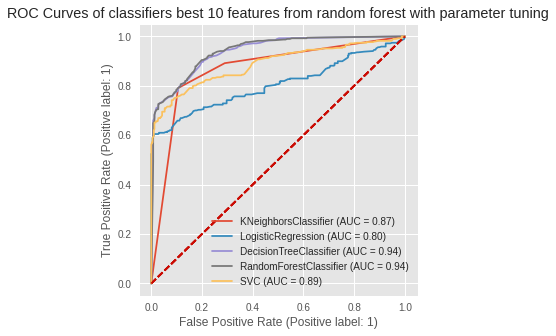

In [494]:
from sklearn.metrics import plot_roc_curve

classifiers7 = [Knn_classiffier7,Logistic_model7,tree7,rf7,svm7]
ax = plt.gca()
for i in classifiers7:
    plot_roc_curve(i, x_test_rf10, y_test_balanced, ax=ax,pos_label=1)

    plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 10 features from random forest with parameter tuning")
plt.show()

**Models with first 20 features selected from the random forest**

In [495]:
# instiating the model
Logistic_model8=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model8.fit(x_train_rf20,y_train_balanced)
Logistic_model8

# making predictions
y_pred_logistic8=Logistic_model8.predict(x_test_rf20)

# Confusion matrix
matrix8_1=confusion_matrix(y_test_balanced,y_pred_logistic8)
print(matrix8_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic8))

# making predictions
y_pred_train9_26=Logistic_model8.predict(x_train_rf20)

# Confusion matrix
matrix9_26=confusion_matrix(y_train_balanced,y_pred_train9_26)
print(matrix9_26)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_26))

[[395   2]
 [ 61 326]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       397
         1.0       0.99      0.84      0.91       387

    accuracy                           0.92       784
   macro avg       0.93      0.92      0.92       784
weighted avg       0.93      0.92      0.92       784

[[1555    7]
 [ 219 1353]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1562
         1.0       0.99      0.86      0.92      1572

    accuracy                           0.93      3134
   macro avg       0.94      0.93      0.93      3134
weighted avg       0.94      0.93      0.93      3134



In [496]:
# KNN on all features with class imbalance
Knn_classiffier8=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier8.fit(x_train_rf20,y_train_balanced)

# making predictions
y_pred_knn8=Knn_classiffier8.predict(x_test_rf20)

# Confusion matrix
matrix8_2=confusion_matrix(y_test_balanced,y_pred_knn8)
print(matrix8_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn8))

# making predictions
y_pred_train9_27=Knn_classiffier8.predict(x_train_rf20)

# Confusion matrix
matrix9_27=confusion_matrix(y_train_balanced,y_pred_train9_27)
print(matrix9_27)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_27))

[[384  13]
 [ 26 361]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       397
         1.0       0.97      0.93      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1553    9]
 [  41 1531]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1562
         1.0       0.99      0.97      0.98      1572

    accuracy                           0.98      3134
   macro avg       0.98      0.98      0.98      3134
weighted avg       0.98      0.98      0.98      3134



In [497]:
# instatiate the model
tree8 =DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree8.fit(x_train_rf20, y_train_balanced)

# making predictions
y_pred_tree8=tree8.predict(x_test_rf20)

# Confusion matrix
matrix8_3=confusion_matrix(y_test_balanced,y_pred_tree8)
print(matrix8_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree8))

# making predictions on train
y_pred_train9_28=tree8.predict(x_train_rf20)

# Confusion matrix
matrix9_28=confusion_matrix(y_train_balanced,y_pred_train9_28)
print(matrix9_28)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_28))

[[383  14]
 [ 23 364]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       397
         1.0       0.96      0.94      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1551   11]
 [  29 1543]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1562
         1.0       0.99      0.98      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



In [498]:
rf8 = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf8.fit(x_train_rf20,y_train_balanced)

# making predictions
y_pred_rf8=rf8.predict(x_test_rf20)

# Confusion matrix
matrix8_4=confusion_matrix(y_test_balanced,y_pred_rf8)
print(matrix8_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf8))

# making predictions on train
y_pred_train9_29=rf8.predict(x_train_rf20)

# Confusion matrix
matrix9_29=confusion_matrix(y_train_balanced,y_pred_train9_29)
print(matrix9_29)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_29))

[[385  12]
 [ 20 367]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       397
         1.0       0.97      0.95      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1545   17]
 [  23 1549]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1562
         1.0       0.99      0.99      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



In [499]:
svm8 =SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm8.fit(x_train_rf20,y_train_balanced)

# making predictions
y_pred_svm8=svm8.predict(x_test_rf20)

# Confusion matrix
matrix8_5=confusion_matrix(y_test_balanced,y_pred_svm8)
print(matrix8_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm8))

# making predictions on train
y_pred_train9_30=svm8.predict(x_train_rf20)

# Confusion matrix
matrix9_30=confusion_matrix(y_train_balanced,y_pred_train9_30)
print(matrix9_30)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_30))

[[391   6]
 [ 42 345]]
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       397
         1.0       0.98      0.89      0.93       387

    accuracy                           0.94       784
   macro avg       0.94      0.94      0.94       784
weighted avg       0.94      0.94      0.94       784

[[1548   14]
 [ 163 1409]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      1562
         1.0       0.99      0.90      0.94      1572

    accuracy                           0.94      3134
   macro avg       0.95      0.94      0.94      3134
weighted avg       0.95      0.94      0.94      3134



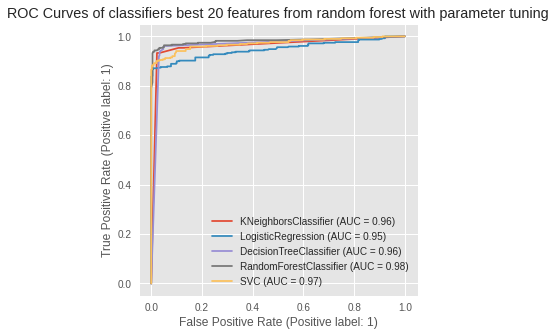

In [500]:
from sklearn.metrics import plot_roc_curve

classifiers8 = [Knn_classiffier8,Logistic_model8,tree8,rf8,svm8]
ax = plt.gca()
for i in classifiers8:
    plot_roc_curve(i, x_test_rf20, y_test_balanced, ax=ax,pos_label=1)
plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 20 features from random forest with parameter tuning")
plt.show()
    

**Models with the first 30 features selecetd from the random forest¶


In [501]:
# instiating the model
Logistic_model9=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model9.fit(x_train_rf30,y_train_balanced)
Logistic_model9

# making predictions
y_pred_logistic9=Logistic_model9.predict(x_test_rf30)

# Confusion matrix
matrix9_1=confusion_matrix(y_test_balanced,y_pred_logistic9)
print(matrix9_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic9))

# making predictions on train
y_pred_train9_31=Logistic_model9.predict(x_train_rf30)

# Confusion matrix
matrix9_31=confusion_matrix(y_train_balanced,y_pred_train9_31)
print(matrix9_31)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_31))

[[393   4]
 [ 30 357]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       397
         1.0       0.99      0.92      0.95       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1549   13]
 [ 102 1470]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1562
         1.0       0.99      0.94      0.96      1572

    accuracy                           0.96      3134
   macro avg       0.96      0.96      0.96      3134
weighted avg       0.96      0.96      0.96      3134



In [502]:
# KNN on all features with class imbalance
Knn_classiffier9=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier9.fit(x_train_rf30,y_train_balanced)

# making predictions
y_pred_knn9=Knn_classiffier9.predict(x_test_rf30)

# Confusion matrix
matrix9_2=confusion_matrix(y_test_balanced,y_pred_knn9)
print(matrix9_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn9))

# making predictions on train
y_pred_train9_32=Knn_classiffier9.predict(x_train_rf30)

# Confusion matrix
matrix9_32=confusion_matrix(y_train_balanced,y_pred_train9_32)
print(matrix9_32)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_32))

[[385  12]
 [ 32 355]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       397
         1.0       0.97      0.92      0.94       387

    accuracy                           0.94       784
   macro avg       0.95      0.94      0.94       784
weighted avg       0.95      0.94      0.94       784

[[1561    1]
 [  29 1543]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1562
         1.0       1.00      0.98      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



In [503]:
# instatiate the model
tree9 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree9.fit(x_train_rf30, y_train_balanced)

# making predictions
y_pred_tree9=tree9.predict(x_test_rf30)

# Confusion matrix
matrix9_3=confusion_matrix(y_test_balanced,y_pred_tree9)
print(matrix9_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree9))

# making predictions on train
y_pred_train9_33=tree9.predict(x_train_rf30)

# Confusion matrix
matrix9_33=confusion_matrix(y_train_balanced,y_pred_train9_33)
print(matrix9_33)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_33))

[[378  19]
 [ 23 364]]
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       397
         1.0       0.95      0.94      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1558    4]
 [  22 1550]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1562
         1.0       1.00      0.99      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



In [504]:
rf9 = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf9.fit(x_train_rf30,y_train_balanced)

# making predictions
y_pred_rf9=rf9.predict(x_test_rf30)

# Confusion matrix
matrix9_4=confusion_matrix(y_test_balanced,y_pred_rf9)
print(matrix9_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf9))


# making predictions on train
y_pred_train9_34=rf9.predict(x_train_rf30)

# Confusion matrix
matrix9_34=confusion_matrix(y_train_balanced,y_pred_train9_34)
print(matrix9_34)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_34))

[[389   8]
 [ 22 365]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       397
         1.0       0.98      0.94      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1555    7]
 [  20 1552]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1562
         1.0       1.00      0.99      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



In [505]:
svm9 =SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm9.fit(x_train_rf30,y_train_balanced)

# making predictions
y_pred_svm9=svm9.predict(x_test_rf30)

# Confusion matrix
matrix9_5=confusion_matrix(y_test_balanced,y_pred_svm9)
print(matrix9_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm9))

# making predictions on train
y_pred_train9_35=svm9.predict(x_train_rf30)

# Confusion matrix
matrix9_35=confusion_matrix(y_train_balanced,y_pred_train9_35)
print(matrix9_35)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_35))

[[395   2]
 [ 30 357]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       397
         1.0       0.99      0.92      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1557    5]
 [  97 1475]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1562
         1.0       1.00      0.94      0.97      1572

    accuracy                           0.97      3134
   macro avg       0.97      0.97      0.97      3134
weighted avg       0.97      0.97      0.97      3134



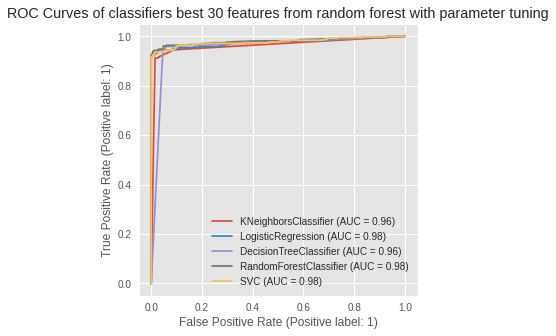

In [506]:
from sklearn.metrics import plot_roc_curve

classifiers9 = [Knn_classiffier9,Logistic_model9,tree9,rf9,svm9]
ax = plt.gca()
for i in classifiers9:
    plot_roc_curve(i, x_test_rf30, y_test_balanced, ax=ax,pos_label=1)

plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 30 features from random forest with parameter tuning")
plt.show()
    

**Models with the first 40 features selected from the random forest**

In [507]:
# instiating the model
Logistic_model10=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model10.fit(x_train_rf40,y_train_balanced)
Logistic_model10

# making predictions
y_pred_logistic10=Logistic_model10.predict(x_test_rf40)

# Confusion matrix
matrix10_1=confusion_matrix(y_test_balanced,y_pred_logistic10)
print(matrix10_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic10))

# making predictions on train
y_pred_train9_36=Logistic_model10.predict(x_train_rf40)

# Confusion matrix
matrix9_36=confusion_matrix(y_train_balanced,y_pred_train9_36)
print(matrix9_36)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_36))

[[394   3]
 [ 27 360]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       397
         1.0       0.99      0.93      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1553    9]
 [  86 1486]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1562
         1.0       0.99      0.95      0.97      1572

    accuracy                           0.97      3134
   macro avg       0.97      0.97      0.97      3134
weighted avg       0.97      0.97      0.97      3134



In [508]:
# KNN on all features with class imbalance
Knn_classiffier10=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier10.fit(x_train_rf40,y_train_balanced)

# making predictions
y_pred_knn10=Knn_classiffier10.predict(x_test_rf40)

# Confusion matrix
matrix10_2=confusion_matrix(y_test_balanced,y_pred_knn10)
print(matrix10_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn10))

# making predictions on train
y_pred_train9_37=Knn_classiffier10.predict(x_train_rf40)

# Confusion matrix
matrix9_37=confusion_matrix(y_train_balanced,y_pred_train9_37)
print(matrix9_37)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_37))

[[387  10]
 [ 28 359]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       397
         1.0       0.97      0.93      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1561    1]
 [  16 1556]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1562
         1.0       1.00      0.99      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



In [509]:
# instatiate the model
tree10 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree10.fit(x_train_rf40, y_train_balanced)

# making predictions
y_pred_tree10=tree10.predict(x_test_rf40)

# Confusion matrix
matrix10_3=confusion_matrix(y_test_balanced,y_pred_tree10)
print(matrix10_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree10))


# making predictions on train
y_pred_train9_38=tree10.predict(x_train_rf40)

# Confusion matrix
matrix9_38=confusion_matrix(y_train_balanced,y_pred_train9_38)
print(matrix9_38)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_38))

[[385  12]
 [ 25 362]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       397
         1.0       0.97      0.94      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1559    3]
 [  11 1561]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1562
         1.0       1.00      0.99      1.00      1572

    accuracy                           1.00      3134
   macro avg       1.00      1.00      1.00      3134
weighted avg       1.00      1.00      1.00      3134



In [510]:
rf10 = RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf10.fit(x_train_rf40,y_train_balanced)

# making predictions
y_pred_rf10=rf10.predict(x_test_rf40)

# Confusion matrix
matrix10_4=confusion_matrix(y_test_balanced,y_pred_rf10)
print(matrix10_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf10))

# making predictions on train
y_pred_train9_39=rf10.predict(x_train_rf40)

# Confusion matrix
matrix9_39=confusion_matrix(y_train_balanced,y_pred_train9_39)
print(matrix9_39)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_39))

[[391   6]
 [ 20 367]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       397
         1.0       0.98      0.95      0.97       387

    accuracy                           0.97       784
   macro avg       0.97      0.97      0.97       784
weighted avg       0.97      0.97      0.97       784

[[1557    5]
 [   9 1563]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1562
         1.0       1.00      0.99      1.00      1572

    accuracy                           1.00      3134
   macro avg       1.00      1.00      1.00      3134
weighted avg       1.00      1.00      1.00      3134



In [511]:
svm10 =SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm10.fit(x_train_rf40,y_train_balanced)

# making predictions
y_pred_svm10=svm10.predict(x_test_rf40)

# Confusion matrix
matrix10_5=confusion_matrix(y_test_balanced,y_pred_svm10)
print(matrix10_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm10))

# making predictions on train
y_pred_train9_40=svm10.predict(x_train_rf40)

# Confusion matrix
matrix9_40=confusion_matrix(y_train_balanced,y_pred_train9_40)
print(matrix9_40)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_40))

[[393   4]
 [ 27 360]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       397
         1.0       0.99      0.93      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1560    2]
 [  81 1491]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1562
         1.0       1.00      0.95      0.97      1572

    accuracy                           0.97      3134
   macro avg       0.97      0.97      0.97      3134
weighted avg       0.97      0.97      0.97      3134



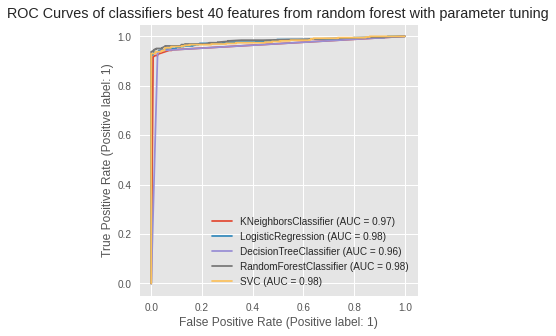

In [512]:
from sklearn.metrics import plot_roc_curve

classifiers10 = [Knn_classiffier10,Logistic_model10,tree10,rf10,svm10]
ax = plt.gca()
for i in classifiers10:
    plot_roc_curve(i, x_test_rf40, y_test_balanced, ax=ax,pos_label=1)
plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 40 features from random forest with parameter tuning")
plt.show()

**Models with the first 50 features selected from the random forest**

In [513]:
# instiating the model
Logistic_model11=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model11.fit(x_train_rf50,y_train_balanced)
Logistic_model11

# making predictions
y_pred_logistic11=Logistic_model11.predict(x_test_rf50)

# Confusion matrix
matrix11_1=confusion_matrix(y_test_balanced,y_pred_logistic11)
print(matrix11_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic11))

# making predictions on train
y_pred_train9_41=Logistic_model11.predict(x_train_rf50)

# Confusion matrix
matrix9_41=confusion_matrix(y_train_balanced,y_pred_train9_41)
print(matrix9_41)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_41))

[[393   4]
 [ 28 359]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       397
         1.0       0.99      0.93      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1554    8]
 [  82 1490]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1562
         1.0       0.99      0.95      0.97      1572

    accuracy                           0.97      3134
   macro avg       0.97      0.97      0.97      3134
weighted avg       0.97      0.97      0.97      3134



In [514]:
# KNN on all features with class imbalance
Knn_classiffier11=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier11.fit(x_train_rf50,y_train_balanced)

# making predictions
y_pred_knn11=Knn_classiffier11.predict(x_test_rf50)

# Confusion matrix
matrix11_2=confusion_matrix(y_test_balanced,y_pred_knn11)
print(matrix11_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn11))

# making predictions on train
y_pred_train9_42=Knn_classiffier11.predict(x_train_rf50)

# Confusion matrix
matrix9_42=confusion_matrix(y_train_balanced,y_pred_train9_42)
print(matrix9_42)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_42))

[[391   6]
 [ 28 359]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       397
         1.0       0.98      0.93      0.95       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1561    1]
 [  16 1556]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1562
         1.0       1.00      0.99      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



In [515]:
# instatiate the model
tree11 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree11.fit(x_train_rf50, y_train_balanced)

# making predictions
y_pred_tree11=tree11.predict(x_test_rf50)

# Confusion matrix
matrix11_3=confusion_matrix(y_test_balanced,y_pred_tree11)
print(matrix11_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree11))

# making predictions on train
y_pred_train9_44=tree11.predict(x_train_rf50)

# Confusion matrix
matrix9_44=confusion_matrix(y_train_balanced,y_pred_train9_44)
print(matrix9_44)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_44))

[[373  24]
 [ 23 364]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       397
         1.0       0.94      0.94      0.94       387

    accuracy                           0.94       784
   macro avg       0.94      0.94      0.94       784
weighted avg       0.94      0.94      0.94       784

[[1559    3]
 [  11 1561]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1562
         1.0       1.00      0.99      1.00      1572

    accuracy                           1.00      3134
   macro avg       1.00      1.00      1.00      3134
weighted avg       1.00      1.00      1.00      3134



In [516]:
rf11= RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf11.fit(x_train_rf50,y_train_balanced)

# making predictions
y_pred_rf11=rf11.predict(x_test_rf50)

# Confusion matrix
matrix11_4=confusion_matrix(y_test_balanced,y_pred_rf11)
print(matrix11_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf11))


# making predictions on train
y_pred_train9_43=rf11.predict(x_train_rf50)

# Confusion matrix
matrix9_43=confusion_matrix(y_train_balanced,y_pred_train9_43)
print(matrix9_43)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_43))

[[391   6]
 [ 20 367]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       397
         1.0       0.98      0.95      0.97       387

    accuracy                           0.97       784
   macro avg       0.97      0.97      0.97       784
weighted avg       0.97      0.97      0.97       784

[[1557    5]
 [  10 1562]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1562
         1.0       1.00      0.99      1.00      1572

    accuracy                           1.00      3134
   macro avg       1.00      1.00      1.00      3134
weighted avg       1.00      1.00      1.00      3134



In [517]:
svm11 =SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm11.fit(x_train_rf50,y_train_balanced)

# making predictions
y_pred_svm11=svm11.predict(x_test_rf50)

# Confusion matrix
matrix11_5=confusion_matrix(y_test_balanced,y_pred_svm11)
print(matrix11_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm11))

# making predictions on train
y_pred_train9_45=svm11.predict(x_train_rf50)

# Confusion matrix
matrix9_45=confusion_matrix(y_train_balanced,y_pred_train9_45)
print(matrix9_45)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_45))

[[391   6]
 [ 27 360]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       397
         1.0       0.98      0.93      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1561    1]
 [  72 1500]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1562
         1.0       1.00      0.95      0.98      1572

    accuracy                           0.98      3134
   macro avg       0.98      0.98      0.98      3134
weighted avg       0.98      0.98      0.98      3134



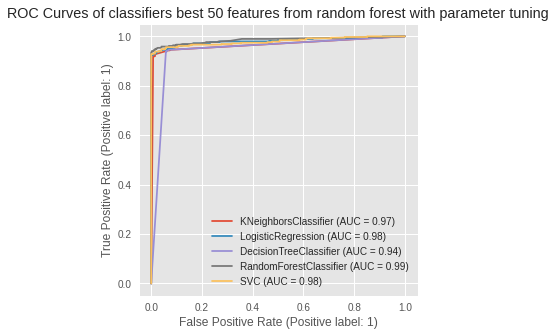

In [518]:
from sklearn.metrics import plot_roc_curve

classifiers11 = [Knn_classiffier11,Logistic_model11,tree11,rf11,svm11]
ax = plt.gca()
for i in classifiers11:
    plot_roc_curve(i, x_test_rf50, y_test_balanced, ax=ax,pos_label=1)
plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 50 features from random forest with parameter tuning")
plt.show()

**Models with the first 45 features selected from the random forest**

In [519]:
# instiating the model
Logistic_model12=LogisticRegression(penalty='l2',C=100)
# fitting the model
Logistic_model12.fit(x_train_rf45,y_train_balanced)
Logistic_model12

# making predictions
y_pred_logistic12=Logistic_model12.predict(x_test_rf45)

# Confusion matrix
matrix12_1=confusion_matrix(y_test_balanced,y_pred_logistic12)
print(matrix12_1)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_logistic12))

# making predictions on train
y_pred_train9_46=Logistic_model12.predict(x_train_rf45)

# Confusion matrix
matrix9_46=confusion_matrix(y_train_balanced,y_pred_train9_46)
print(matrix9_46)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_46))

[[393   4]
 [ 28 359]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       397
         1.0       0.99      0.93      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1552   10]
 [  83 1489]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1562
         1.0       0.99      0.95      0.97      1572

    accuracy                           0.97      3134
   macro avg       0.97      0.97      0.97      3134
weighted avg       0.97      0.97      0.97      3134



In [520]:
# KNN on all features with class imbalance
Knn_classiffier12=KNN(n_neighbors = 2, weights = 'distance',metric ='minkowski')
Knn_classiffier12.fit(x_train_rf45,y_train_balanced)

# making predictions
y_pred_knn12=Knn_classiffier12.predict(x_test_rf45)

# Confusion matrix
matrix12_2=confusion_matrix(y_test_balanced,y_pred_knn12)
print(matrix12_2)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_knn12))

# making predictions on train
y_pred_train9_47=Knn_classiffier12.predict(x_train_rf45)

# Confusion matrix
matrix9_47=confusion_matrix(y_train_balanced,y_pred_train9_47)
print(matrix9_47)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_47))

[[390   7]
 [ 28 359]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       397
         1.0       0.98      0.93      0.95       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

[[1561    1]
 [  16 1556]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1562
         1.0       1.00      0.99      0.99      1572

    accuracy                           0.99      3134
   macro avg       0.99      0.99      0.99      3134
weighted avg       0.99      0.99      0.99      3134



In [521]:
# instatiate the model
tree12 = DecisionTree(criterion='entropy',max_depth=None,max_features=1, min_samples_leaf=1)
#
# Step 2: fit the decision tree to our data
tree12.fit(x_train_rf45, y_train_balanced)

# making predictions
y_pred_tree12=tree12.predict(x_test_rf45)

# Confusion matrix
matrix12_3=confusion_matrix(y_test_balanced,y_pred_tree12)
print(matrix12_3)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_tree12))

# making predictions on train
y_pred_train9_48=tree12.predict(x_train_rf45)

# Confusion matrix
matrix9_48=confusion_matrix(y_train_balanced,y_pred_train9_48)
print(matrix9_48)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_48))

[[378  19]
 [ 20 367]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       397
         1.0       0.95      0.95      0.95       387

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.95       784

[[1559    3]
 [  11 1561]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1562
         1.0       1.00      0.99      1.00      1572

    accuracy                           1.00      3134
   macro avg       1.00      1.00      1.00      3134
weighted avg       1.00      1.00      1.00      3134



In [522]:
rf12= RandomForest(n_estimators=70, random_state=42,verbose=0,criterion='entropy',warm_start=False)

# Step 2: fit the random forest to our data
rf12.fit(x_train_rf45,y_train_balanced)

# making predictions
y_pred_rf12=rf12.predict(x_test_rf45)

# Confusion matrix
matrix12_4=confusion_matrix(y_test_balanced,y_pred_rf12)
print(matrix12_4)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_rf12))

# making predictions on train
y_pred_train9_49=rf12.predict(x_train_rf45)

# AUC ON TRAIN AND TEST
ROC_AUC_rf12_test_rf45= roc_auc_score(y_test_balanced,y_pred_rf12)*100
print('test_auc ={:.4f}'.format(ROC_AUC_rf12_test_rf45))
ROC_AUC_rf12_train_rf45= roc_auc_score(y_train_balanced,y_pred_train9_49)*100
print('train_auc= {:.4f}'.format(ROC_AUC_rf12_train_rf45))

# Confusion matrix
matrix9_49=confusion_matrix(y_train_balanced,y_pred_train9_49)
print(matrix9_49)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_49))

[[390   7]
 [ 21 366]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       397
         1.0       0.98      0.95      0.96       387

    accuracy                           0.96       784
   macro avg       0.97      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

test_auc =96.4052
train_auc= 99.5217
[[1556    6]
 [   9 1563]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1562
         1.0       1.00      0.99      1.00      1572

    accuracy                           1.00      3134
   macro avg       1.00      1.00      1.00      3134
weighted avg       1.00      1.00      1.00      3134



In [523]:
svm12=SVC(C=100, gamma=0.01, kernel='rbf')

# Step 2: fit the random forest to our data
svm12.fit(x_train_rf45,y_train_balanced)

# making predictions
y_pred_svm12=svm12.predict(x_test_rf45)

# Confusion matrix
matrix12_5=confusion_matrix(y_test_balanced,y_pred_svm12)
print(matrix12_5)
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,y_pred_svm12))


from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

# making predictions on train
y_pred_train9_50=svm12.predict(x_train_rf45)

# AUC ON TRAIN AND TEST
ROC_AUC_svm12_test_rf45= roc_auc_score(y_test_balanced,y_pred_rf12)*100
#print("test_auc ="+'{:.4f}'.format(ROC_AUC_svm12_test_rf45)+" percent"+" in SVM")
print("test_auc ="+'{}'.format(ROC_AUC_svm12_test_rf45)+" percent"+" in SVM")
ROC_AUC_svm12_train_rf45= roc_auc_score(y_train_balanced,y_pred_train9_49)*100
#print("train_auc= "+'{:.4f}'.format(ROC_AUC_svm12_train_rf45)+" percent"+" in SVM")
print("train_auc= "+'{}'.format(ROC_AUC_svm12_train_rf45)+" percent"+" in SVM")

#print("Test error = "'{}'.format(test_error_tree)+" percent in Decision Tree Regressor")

#train_error_svm=error/len(y_Train)*100
#print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in SVM Regressor")


# Confusion matrix
matrix9_50=confusion_matrix(y_train_balanced,y_pred_train9_50)
print(matrix9_50)
from sklearn.metrics import classification_report
print(classification_report(y_train_balanced,y_pred_train9_50))

[[392   5]
 [ 27 360]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       397
         1.0       0.99      0.93      0.96       387

    accuracy                           0.96       784
   macro avg       0.96      0.96      0.96       784
weighted avg       0.96      0.96      0.96       784

test_auc =96.40520961474625 percent in SVM
train_auc= 99.52167899834818 percent in SVM
[[1561    1]
 [  77 1495]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      1562
         1.0       1.00      0.95      0.97      1572

    accuracy                           0.98      3134
   macro avg       0.98      0.98      0.98      3134
weighted avg       0.98      0.98      0.98      3134



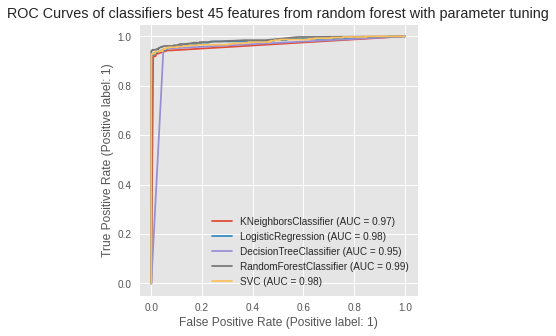

In [524]:
from sklearn.metrics import plot_roc_curve

classifiers12= [Knn_classiffier12,Logistic_model12,tree12,rf12,svm12]
ax = plt.gca()
for i in classifiers12:
    plot_roc_curve(i, x_test_rf45, y_test_balanced, ax=ax,pos_label=1)
    
plt.legend(loc='best')
plt.title("ROC Curves of classifiers best 45 features from random forest with parameter tuning")
plt.show()

In [525]:
##col={'Train Error':train_error,'Test Error':test_error}
#models=['Ridge Regression','Knn','Bayesian Regression','Decision Tree','SVM']
#df=DataFrame(data=col,index=models)
#df
train_auc=[ROC_AUC_rf12_train_rf45,ROC_AUC_svm12_train_rf45]
test_auc=[ROC_AUC_rf12_test_rf45,ROC_AUC_svm12_test_rf45]
col={"Train AUC":train_auc,"Test AUC":test_auc}
models=["random forest_rf45","SVM_rf45"]
df=pd.DataFrame(data=col,index=models)

df




,Train AUC,Test AUC
random forest_rf45,99.521679,96.40521
SVM_rf45,99.521679,96.40521


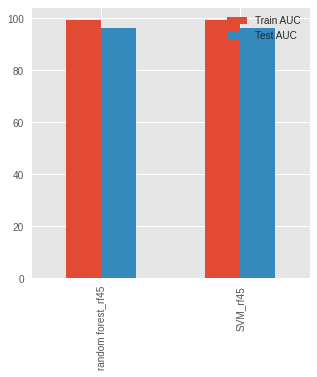

In [526]:
df.plot(kind='bar')

In [527]:
#!pip install pycaret
import pycaret

from pycaret.classification import *

In [528]:
#compare_models
models

<function pycaret.classification.models(type: Union[str, NoneType] = None, internal: bool = False, raise_errors: bool = True) -> pandas.core.frame.DataFrame>

# New Section

# New Section